# DSI 16 Capstone: E-Commerce Seller Sales Estimator & Insights

By Alexis Lim

# Executive Summary

This project folder contains my capstone project for the General Assembly DSI-16 course. It leverages an e-commerce dataset provided by the Brazilian company Olist, available on [Kaggle](https://www.kaggle.com/olistbr/brazilian-ecommerce). 

The focus of the project was to build a sales prediction model for Olist sellers. We also perform NLP on the reviews in Portuguese to determine dominant topics in reviews.

The project is split up into two notebooks as follows:

**Project Notebooks**
- Notebook 1: Cleaning and EDA (This notebook)
- Notebook 2: Sales Estimate Prediction & Topic Modeling 

## Data Dictionary

The final data leveraged by the sales estimator model included:

|Feature|Datatype|Description|
|-------|--------|-----------|
|most_common_cat|String|Dominant product category of the seller (one-hot encoded in final model)|
|number_of_product_categories|Int|Number of product categories|
|num_products_stock|Int|Number of unique products in stock|
|average_product_price|Float|Average price of product|
|average_products_per_month|Float|Average products per month|
|state|String|State of the seller (one-hot encoded in final model)|
|min_price|float|Minimum product price
|max_price|float|Maximum product price|

## Conclusion and Insights

We were able to build a predictive model for predicting seller performance with around R$200 of root mean squared error and an adjusted R2 score of 0.93. However, as the data is not completely comprehensive, the model will require additional training on more data to be sufficiently robust and to evaluate its reproducibility.

The model predicts seller performances by taking in the following information:

- Product Category
- State
- Min, Max, Average Product Price
- Number of Products they can sell in a month
- Number of Unique Products

Average products they can sell in a month turned out to be the most predictive factor, along with the minimum, maximum and average product prices. With more data and potentially more inputs from the seller like the size of their company, length of seller relationship to Olist, we may want to also try predicting optimal product volume that can be sold instead, in the long run.

## Table of Contents

- [Introduction](#Introduction)
- [Data Summary](#Data-Summary)
- [Data Cleaning & EDA](#Data-Cleaning-&-Exploratory-Data-Analysis)
  - [Master Dataset](##Master-Dataset)
  - [Geolocation](##Geolocation-Data)
  - [Orders Dataset](##Order-Dataset)
  - [Sellers Dataset](##Seller-Dataset)
  - [Reviews Dataset](##Reviews)
- [Next Steps](#Next-Steps)

## Notebook Library Imports

Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
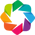

In [1]:
# Data processing 
import pandas as pd
import numpy as np
import math
import collections

# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, save, show

import holoviews as hv
import datashader as ds
from colorcet import fire, rainbow
from datashader.colors import colormap_select, Greys9
from holoviews.streams import RangeXY
from holoviews.operation.datashader import datashade, dynspread, rasterize
from holoviews import dim

from datashader.utils import lnglat_to_meters as webm

from bokeh.io import push_notebook, show, output_notebook
from bokeh.models import HoverTool
output_notebook()
hv.extension('bokeh')

# NLP Libraries

from googletrans import Translator, constants

import nltk
from bs4 import BeautifulSoup             
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import regex as re
from nltk.corpus import stopwords
from nltk.corpus import wordnet

import spacy
sp = spacy.load('en_core_web_sm') 
from textblob import TextBlob


from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [2]:
# Set display options
sns.set_style('darkgrid')
sns.set_palette('Spectral')

pd.options.display.max_columns = None
pd.options.display.max_rows = None

%opts Overlay [width=800 height=600 toolbar='above' xaxis=None yaxis=None]
%opts QuadMesh [tools=['hover'] colorbar=True] (alpha=0 hover_alpha=0.2)

# Introduction

## Background

We are a team of data scientists at Olist, an online e-commerce company that connects small businesses from all over Brazil to large online e-commerce marketplaces such as [Mercado Livre](https://www.mercadolivre.com.br/) and [Americanas](https://www.americanas.com.br/).

By listing their products on Olist Store, small business owners are able to sell their products to customers on these marketplaces without the prohibitive costs of maintaining a vendor presence there.

We have been given access to a number of datasets that include the following:

- Olist Orders: A sample of 100K orders across 2016 and 2018
- Order Items: Individual items purchased within each order (customer id, product id and order id may be duplicated)
- Order Payments: Payments by order, including payment type and number of installments
- Products: Products dataset with product ID and category
- Translation: English translation for product category name
- Geolocation: Location of customers
- Reviews: Reviews submitted by order id 
- Sellers: Unique seller ids and seller details

For this assignment, we want to focus on how we can use the data to increase the number of sellers and provide recommendations to them. Having a wide variety of sellers is incredibly important to us at Olist, and we are always looking for new ways to get new leads and onboard sellers onto our platform. 

## Problem Statement

Based on the data we've gathered from the sales and reviews on the platform, we have been tasked to estimate the sales that a seller can get based on factors such as their product category, average product price and location. 

Additionally, we also want to take a look at the reviews to give potential sellers advice on how to increase customer satisfaction.

Our guiding questions are:
- How much can a seller expect to earn on the platform?
- What steps can a seller take to increase their sales?
- What are the prominent topics that feature in our customer reviews?

# Data Summary

## Data Import & Summary

We have been given access to 9 datasets in total, which are samples of data taken across 2016 and 2018, of about 100K orders.

According to the [data documentation](https://www.kaggle.com/olistbr/brazilian-ecommerce/discussion/66466), the data was sampled by taking a random sample of all orders that received a customer review, in order to reduce the amount of null values in that dataset. Hence, we understand the sample is biased in some degree and working with the full dataset may yield slightly different results. However, we will treat this dataset as non-biased for the sake of our analysis.

In [3]:
# Read in our datasets
orders = pd.read_csv('../datasets/source/olist_orders_dataset.csv')
order_items = pd.read_csv('../datasets/source/olist_order_items_dataset.csv')
order_payments = pd.read_csv('../datasets/source/olist_order_payments_dataset.csv')
products = pd.read_csv('../datasets/source/olist_products_dataset.csv')
customers = pd.read_csv('../datasets/source/olist_customers_dataset.csv', dtype={'customer_zip_code_prefix':'string'})
translation = pd.read_csv('../datasets/source/product_category_name_translation.csv')
geo = pd.read_csv('../datasets/source/olist_geolocation_dataset.csv', dtype={'geolocation_zip_code_prefix':'string'})
reviews = pd.read_csv('../datasets/source/olist_order_reviews_dataset.csv')
sellers = pd.read_csv('../datasets/source/olist_sellers_dataset.csv', dtype={'seller_zip_code_prefix':'string'})

In [4]:
# Function to show details of the dataset

def explore_dataset(df):
    # Print columns and rows
    print(f'Dataset rows: {df.shape[0]}')
    print(f'Dataset columns: {df.shape[1]}')
    df_explore = []
    
    # For each column, show a sample of the entry, null percentages and unique values
    for i, col in enumerate(df.columns):
        col_explore = {}
        col_explore['column'] = col
        col_explore['sample'] = df[col][0]
        col_explore['nulls'] = df[col].isnull().sum()
        col_explore['null_pct'] = round(df[col].isnull().sum() / df.shape[0], 3)
        col_explore['uniques'] = df[col].nunique()
        df_explore.append(col_explore)
    df_exp = pd.DataFrame(df_explore)
    return df_exp

In [5]:
explore_dataset(orders)

Dataset rows: 99441
Dataset columns: 8


column                            sample  nulls  \
0                       order_id  e481f51cbdc54678b7cc49136f2d6af7      0   
1                    customer_id  9ef432eb6251297304e76186b10a928d      0   
2                   order_status                         delivered      0   
3       order_purchase_timestamp               2017-10-02 10:56:33      0   
4              order_approved_at               2017-10-02 11:07:15    160   
5   order_delivered_carrier_date               2017-10-04 19:55:00   1783   
6  order_delivered_customer_date               2017-10-10 21:25:13   2965   
7  order_estimated_delivery_date               2017-10-18 00:00:00      0   

   null_pct  uniques  
0     0.000    99441  
1     0.000    99441  
2     0.000        8  
3     0.000    98875  
4     0.002    90733  
5     0.018    81018  
6     0.030    95664  
7     0.000      459

The orders dataset contains information about individual order, including the customer id, order status and the dates where they were delivered. The dataset can be merged with the customers dataset via customer id.

A quick look at the order status shows us that some orders were canceled or were being processed when the data was pulled.

In [6]:
orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [7]:
explore_dataset(customers)

Dataset rows: 99441
Dataset columns: 5


column                            sample  nulls  \
0               customer_id  06b8999e2fba1a1fbc88172c00ba8bc7      0   
1        customer_unique_id  861eff4711a542e4b93843c6dd7febb0      0   
2  customer_zip_code_prefix                             14409      0   
3             customer_city                            franca      0   
4            customer_state                                SP      0   

   null_pct  uniques  
0       0.0    99441  
1       0.0    96096  
2       0.0    14994  
3       0.0     4119  
4       0.0       27

The customer dataset gives us customer id as well as unique customer id, which would allow us to see customers with repeat purchases. As we only have about 100K sales records, it seems like only a few thousand customers have repeat history purchases, but with a fuller dataset, this will be another interesting point to analyse.

We also have data on the customer's zip code prefix, city and state.

In [8]:
explore_dataset(order_items)

Dataset rows: 112650
Dataset columns: 7


column                            sample  nulls  null_pct  \
0             order_id  00010242fe8c5a6d1ba2dd792cb16214      0       0.0   
1        order_item_id                                 1      0       0.0   
2           product_id  4244733e06e7ecb4970a6e2683c13e61      0       0.0   
3            seller_id  48436dade18ac8b2bce089ec2a041202      0       0.0   
4  shipping_limit_date               2017-09-19 09:45:35      0       0.0   
5                price                              58.9      0       0.0   
6        freight_value                             13.29      0       0.0   

   uniques  
0    98666  
1       21  
2    32951  
3     3095  
4    93318  
5     5968  
6     6999

The order items dataset gives us more useful information such as the price and freight value of individual products within each order. This can be matched to the orders dataset via order id, as well as to the other datasets via seller id and product id.

In [9]:
explore_dataset(products)

Dataset rows: 32951
Dataset columns: 9


column                            sample  nulls  \
0                  product_id  1e9e8ef04dbcff4541ed26657ea517e5      0   
1       product_category_name                        perfumaria    610   
2         product_name_lenght                                40    610   
3  product_description_lenght                               287    610   
4          product_photos_qty                                 1    610   
5            product_weight_g                               225      2   
6           product_length_cm                                16      2   
7           product_height_cm                                10      2   
8            product_width_cm                                14      2   

   null_pct  uniques  
0     0.000    32951  
1     0.019       73  
2     0.019       66  
3     0.019     2960  
4     0.019       19  
5     0.000     2204  
6     0.000       99  
7     0.000      102  
8     0.000       95

In [10]:
explore_dataset(translation)

Dataset rows: 71
Dataset columns: 2


column         sample  nulls  null_pct  uniques
0          product_category_name   beleza_saude      0       0.0       71
1  product_category_name_english  health_beauty      0       0.0       71

The products and translation datasets go hand-in-hand, and we'll merge them together so we can perform our analysis on the English product category name.

In [11]:
explore_dataset(sellers)

Dataset rows: 3095
Dataset columns: 4


column                            sample  nulls  null_pct  \
0               seller_id  3442f8959a84dea7ee197c632cb2df15      0       0.0   
1  seller_zip_code_prefix                             13023      0       0.0   
2             seller_city                          campinas      0       0.0   
3            seller_state                                SP      0       0.0   

   uniques  
0     3095  
1     2246  
2      611  
3       23

Similar to the customers dataset, we have the location data for each seller in the dataset. We have around 3,000 sellers for which we can aggregate the order and purchase data.

In [12]:
explore_dataset(geo)

Dataset rows: 1000163
Dataset columns: 5


column     sample  nulls  null_pct  uniques
0  geolocation_zip_code_prefix      01037      0       0.0    19015
1              geolocation_lat   -23.5456      0       0.0   717358
2              geolocation_lng   -46.6393      0       0.0   717613
3             geolocation_city  sao paulo      0       0.0     8011
4            geolocation_state         SP      0       0.0       27

The geolocation dataset can be merged with the location columns for sellers and customers. However, we have to note that although we have 1,000,000 rows, we only have about 19,000 unique zip code prefixes where the rest of the identifying data apart from latitude and longitude has been removed. 

Hence, we will not be able to match each individual seller and customer to an exact latitude/longitude but will have to aggregate the locations data to approximate this data.

In [13]:
explore_dataset(reviews)

Dataset rows: 100000
Dataset columns: 7


column                            sample  nulls  null_pct  \
0                review_id  7bc2406110b926393aa56f80a40eba40      0     0.000   
1                 order_id  73fc7af87114b39712e6da79b0a377eb      0     0.000   
2             review_score                                 4      0     0.000   
3     review_comment_title                               NaN  88285     0.883   
4   review_comment_message                               NaN  58247     0.582   
5     review_creation_date               2018-01-18 00:00:00      0     0.000   
6  review_answer_timestamp               2018-01-18 21:46:59      0     0.000   

   uniques  
0    99173  
1    99441  
2        5  
3     4600  
4    36921  
5      637  
6    99010

In [14]:
reviews.head(5)

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

Finally, our reviews dataset contains reviews submitted by customers, where the score is made on a scale of 1-5. Customers are notified upon them receiving the product or when the estimated delivery date is due that they can submit a review. 

Not all customers submit a review, and as we can see from the null data, most customers may not leave a message with their review.

The creation date marks when the date was sent to the customer, while the answer date is when the review was submitted.

## Approach and Methodology

Due to the way our data is structured, we will need to take the following steps to prepare our data for analysis and modeling:

**Order, Product, Seller and Customer Data**

We will need to create two datasets:
- Master dataset combining all 4 datasets
- Seller performance dataset aggregating the product information, sales and freight of all sellers

**Reviews Data**

As the comment messages and titles are in Portuguese, we will need to do the following before we can perform topic modeling:

- Combine title and messages
- Translate the reviews with text into English 
- Remove stopwords and clean translated reviews

# Data Cleaning & Exploratory Data Analysis

## Master Dataset

We remove all of the orders that have been cancelled or have their status unavailable.

In [15]:
# Check how many orders have canceled or unavailable status

orders[(orders['order_status'] == 'canceled') | (orders['order_status'] == 'unavailable')].shape

(1234, 8)

In [16]:
# Drop all orders that are cancelled or have unavailable status
orders = orders[~((orders['order_status'] == 'canceled') | (orders['order_status'] == 'unavailable'))]

In [17]:
# Merge order items and orders on order id

order_items_master = pd.merge(order_items, orders, 
                              left_on = 'order_id', right_on = 'order_id', 
                              how='inner') #Drop rows that are not present in both.

order_items_master.isnull().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date      721
order_delivered_customer_date    1912
order_estimated_delivery_date       0
dtype: int64

In [18]:
# Combine products with EN translations, drop the Brazilian category

products = pd.merge(products, translation, on='product_category_name', how='left')

products.drop("product_category_name", axis=1, inplace=True)
products.rename(columns={'product_category_name_english':'product_category_name'}, inplace=True) # Rename english column

products.isnull().sum()

product_id                      0
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
product_category_name         623
dtype: int64

In [19]:
# Merge order master with products dataset

order_items_master = pd.merge(order_items_master, products, on='product_id', how='left')

In [20]:
print(order_items_master.isnull().sum())

order_items_master[order_items_master['product_category_name'].isnull()]['product_id'].nunique()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date      721
order_delivered_customer_date    1912
order_estimated_delivery_date       0
product_name_lenght              1589
product_description_lenght       1589
product_photos_qty               1589
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
product_category_name            1611
dtype: int64


611

For some products, we don't have the product details - about 1.6K rows and 623 products. A closer look shows us that the null products are in around 1.4K orders, of which only around 80+ entries have the product data available. Since we don't want to consider orders with product details that are null, we'll drop these orders.

In [21]:
product_cols = products.columns.tolist()

In [22]:
order_items_master[order_items_master['product_category_name'].isnull() | 
                   order_items_master['product_weight_g'].isnull()].shape

(1612, 22)

In [23]:
orders_with_null_products = order_items_master[order_items_master['product_category_name'].isnull() | 
                   order_items_master['product_weight_g'].isnull()]['order_id']

In [24]:
len(orders_with_null_products)

1612

In [25]:
order_items_master[order_items_master['order_id'].isin(orders_with_null_products)].notnull().sum()

order_id                         1699
order_item_id                    1699
product_id                       1699
seller_id                        1699
shipping_limit_date              1699
price                            1699
freight_value                    1699
customer_id                      1699
order_status                     1699
order_purchase_timestamp         1699
order_approved_at                1698
order_delivered_carrier_date     1672
order_delivered_customer_date    1645
order_estimated_delivery_date    1699
product_name_lenght               110
product_description_lenght        110
product_photos_qty                110
product_weight_g                 1681
product_length_cm                1681
product_height_cm                1681
product_width_cm                 1681
product_category_name              88
dtype: int64

In [26]:
order_items_master = order_items_master[~order_items_master['order_id'].isin(orders_with_null_products)]

order_items_master.isnull().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date      694
order_delivered_customer_date    1858
order_estimated_delivery_date       0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
product_category_name               0
dtype: int64

In [27]:
# Merge with reviews (exclude message columns and time columns)
order_items_master = pd.merge(order_items_master, 
                              reviews[['review_id', 'order_id', 'review_score']], 
                              on='order_id', how='left')

In [28]:
order_items_master.isnull().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date      699
order_delivered_customer_date    1874
order_estimated_delivery_date       0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
product_category_name               0
review_id                           0
review_score                        0
dtype: int64

In [29]:
order_items_master[order_items_master['order_delivered_customer_date'].isnull()].head()

order_id  order_item_id  \
79   002f19a65a2ddd70a090297872e6d64e              1   
255  00a99c50fdff7e36262caba33821875a              1   
540  01443cd06ea8bce82c554a46f307459f              1   
572  015fb6b5f739788434fa690540f90f19              1   
573  015fb6b5f739788434fa690540f90f19              2   

                           product_id                         seller_id  \
79   9eae06d51aaa383b2bed5547a19d581c  1835b56ce799e6a4dc4eddc053f04066   
255  76d75f398634bf194ba99d7297e7d1fa  974cf2cb8f4b7add98709c30df02fe10   
540  f77dd338d9f75229a09cbb9a18fd0c9a  1c129092bf23f28a5930387c980c0dfc   
572  a0eccc912d428eaddf1ef4fe47593ece  8a87611c08849ffeeccab52aa798b6c7   
573  a0eccc912d428eaddf1ef4fe47593ece  8a87611c08849ffeeccab52aa798b6c7   

     shipping_limit_date   price  freight_value  \
79   2018-03-27 13:15:27   53.98          23.31   
255  2018-08-21 16:35:18   52.99          22.30   
540  2018-01-10 14:32:12   25.00          14.10   
572  2017-02-04 13:06:05  143.00          94.98   
573  2017-02-04 13:06:05  143.00          94.98   

                          customer_id order_status order_purchase_timestamp  \
79   7fa80efb1ef15ca4104627910c29791c      shipped      2018-03-21 13:05:30   
255  7a399396442d5601cbedfbd0a3cf1da4      shipped      2018-08-17 16:25:04   
540  7995a0161ac789e3a05607de1620d517      shipped      2018-01-03 10:43:02   
572  eca9b206f2a9e4693bf0840895434e2c     invoiced      2017-01-31 13:06:05   
573  eca9b206f2a9e4693bf0840895434e2c     invoiced      2017-01-31 13:06:05   

       order_approved_at order_delivered_carrier_date  \
79   2018-03-21 13:15:27          2018-03-22 00:13:35   
255  2018-08-17 16:35:18          2018-08-18 09:07:00   
540  2018-01-04 14:32:48          2018-01-05 17:35:19   
572  2017-02-02 02:41:22                          NaN   
573  2017-02-02 02:41:22                          NaN   

    order_delivered_customer_date order_estimated_delivery_date  \
79                            NaN           2018-04-16 00:00:00   
255                           NaN           2018-09-18 00:00:00   
540                           NaN           2018-02-01 00:00:00   
572                           NaN           2017-03-09 00:00:00   
573                           NaN           2017-03-09 00:00:00   

     product_name_lenght  product_description_lenght  product_photos_qty  \
79                  52.0                       337.0                 1.0   
255                 59.0                      1775.0                 4.0   
540                 42.0                       734.0                 5.0   
572                 36.0                       809.0                 3.0   
573                 36.0                       809.0                 3.0   

     product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
79              800.0               16.0               10.0              16.0   
255             350.0               25.0               11.0              15.0   
540             400.0               20.0               20.0              20.0   
572           30000.0               62.0               55.0              60.0   
573           30000.0               62.0               55.0              60.0   

     product_category_name                         review_id  review_score  
79          bed_bath_table  396eacbff771557619771e8d4b58ee77             3  
255  computers_accessories  e92a1612d8dcd014217178bd28cc54b2             5  
540         bed_bath_table  585ae31deac2a4bcbb0c492191ee4f0e             1  
572       office_furniture  66e1078073f6c367187af35c86ca1650             1  
573       office_furniture  66e1078073f6c367187af35c86ca1650             1

There are some rows where the goods are marked as delivered by the carrier but not by the customer.

In [30]:
# Converting columns to datetime

order_items_master['shipping_limit_date'] = pd.to_datetime(order_items_master['shipping_limit_date'])
order_items_master['order_purchase_timestamp'] = pd.to_datetime(order_items_master['order_purchase_timestamp'])
order_items_master['order_approved_at'] = pd.to_datetime(order_items_master['order_approved_at'])
order_items_master['order_delivered_carrier_date'] = pd.to_datetime(order_items_master['order_delivered_carrier_date'])
order_items_master['order_delivered_customer_date'] = pd.to_datetime(order_items_master['order_delivered_customer_date'])
order_items_master['order_estimated_delivery_date'] = pd.to_datetime(order_items_master['order_estimated_delivery_date'])

In [31]:
# Calculating delivery time in days

order_items_master['shipping_limit_time'] = order_items_master['shipping_limit_date'] - order_items_master['order_purchase_timestamp']
order_items_master['delivery_time'] =  order_items_master['order_delivered_customer_date'] - order_items_master['order_purchase_timestamp']
order_items_master['delivery_time_diff'] = order_items_master['order_estimated_delivery_date'] - order_items_master['order_delivered_customer_date']

order_items_master['shipping_limit_time'] = (order_items_master['shipping_limit_time'] / pd.Timedelta(1, unit='d'))
order_items_master['delivery_time'] = (order_items_master['delivery_time'] / pd.Timedelta(1, unit='d'))
order_items_master['delivery_time_diff'] = order_items_master['delivery_time_diff'] / pd.Timedelta(1, unit='d')

In [32]:
# Create total cost column and get the year, month, week, day of the week and day of the year of the purchase

order_items_master['total_cost'] = order_items_master['price'] + order_items_master['freight_value']

order_items_master['purchase_year'] = order_items_master['order_purchase_timestamp'].dt.year
order_items_master['purchase_month'] = order_items_master['order_purchase_timestamp'].dt.month
order_items_master['purchase_week'] = order_items_master['order_purchase_timestamp'].dt.isocalendar().week
order_items_master['purchase_dayweek'] = order_items_master['order_purchase_timestamp'].dt.dayofweek
order_items_master['purchase_dayyear'] = order_items_master['order_purchase_timestamp'].dt.dayofyear

In [33]:
# Save our master df

order_items_master.to_csv('../datasets/processed/master_order_items.csv', index=False)

### Product Categories

Let's take a closer look at our product categories. A count shows that we have a total of 71 categories in the dataset. As we are not sure if the dataset covers all of the product categories on Olist, there could potentially be more, but these should cover the major categories on the platform.

In [34]:
order_items_master = pd.read_csv("../datasets/processed/master_order_items.csv")

In [35]:
order_items_master['product_category_name'].nunique()

71

In [36]:
order_items_master.groupby('product_category_name').agg({'price': ['count', 'mean']})

price             
                                         count         mean
product_category_name                                      
agro_industry_and_commerce                 212   342.124858
air_conditioning                           295   185.502237
art                                        208   116.190577
arts_and_craftmanship                       24    75.583750
audio                                      364   139.336538
auto                                      4222   139.250952
baby                                      3049   134.048501
bed_bath_table                           11242    93.343765
books_general_interest                     546    83.557308
books_imported                              59    78.302712
books_technical                            269    71.185985
cds_dvds_musicals                           14    52.142857
christmas_supplies                         152    57.814671
cine_photo                                  73    95.196712
computers                                  203  1098.340542
computers_accessories                     7843   116.178717
consoles_games                            1128   137.821161
construction_tools_construction            929   156.492992
construction_tools_lights                  303   132.772277
construction_tools_safety                  189   209.465714
cool_stuff                                3787   164.377911
costruction_tools_garden                   229   110.938341
costruction_tools_tools                    103   154.407282
diapers_and_hygiene                         38    40.494474
drinks                                     382    58.785105
dvds_blu_ray                                62    73.540161
electronics                               2757    57.052753
fashio_female_clothing                      50    57.788800
fashion_bags_accessories                  2031    74.884298
fashion_childrens_clothes                    8    71.231250
fashion_male_clothing                      130    82.299385
fashion_shoes                              263    89.572548
fashion_sport                               31    69.177419
fashion_underwear_beach                    131    72.836260
fixed_telephony                            262   220.855725
flowers                                     33    33.637576
food                                       509    57.452868
food_drink                                 278    54.713921
furniture_bedroom                          110   184.352545
furniture_decor                           8375    87.642152
furniture_living_room                      503   136.485626
furniture_mattress_and_upholstery           38   114.949474
garden_tools                              4342   111.051573
health_beauty                             9690   130.047387
home_appliances                            807   102.881425
home_appliances_2                          238   467.803319
home_comfort_2                              30    25.342333
home_confort                               437   134.619542
home_construction                          604   137.632401
housewares                                6926    90.739988
industry_commerce_and_business             269   147.753197
kitchen_dining_laundry_garden_furniture    279   165.126774
la_cuisine                                  14   146.785000
luggage_accessories                       1088   128.778842
market_place                               310    91.253129
music                                       38   158.798684
musical_instruments                        668   281.077156
office_furniture                          1700   161.673229
party_supplies                              43   104.306512
perfumery                                 3416   116.409713
pet_shop                                  1938   110.277219
security_and_services                        2   141.645000
signaling_and_security                     199   108.086583
small_appliances                           675   279.748385
small_appliances_home

Looking at the product category names, there appear to be some overlap between some of them. There is some aggregation that can be done, based on the list of categories. We can combine a few of them into an overarching group e.g. for fashion, we can combine them into clothes and shoes. In general, related categories can be combined, especially if there is not much difference between the mean price.

In [37]:
# Define a dictionary to help with category renaming. 
# Aggregation is done across categories such as construction tools and books.

cat_rename_dict = {
 'agro_industry_and_commerce':'agro_industry_and_commerce' ,
 'air_conditioning': 'air_conditioning',
 'art': 'art',
 'arts_and_craftmanship': 'art',
 'audio': 'audio',
 'auto': 'auto',
 'baby': 'baby',
 'bed_bath_table': 'bed_bath_table',
 'books_general_interest': 'books',
 'books_imported': 'books',
 'books_technical': 'books',
 'cds_dvds_musicals': 'cds_dvds',
 'christmas_supplies': 'party_supplies',
 'cine_photo': 'cine_photo',
 'computers': 'computers',
 'computers_accessories': 'computers_accessories',
 'consoles_games': 'consoles_games',
 'construction_tools_construction': 'construction',
 'construction_tools_lights': 'construction',
 'construction_tools_safety': 'construction',
 'cool_stuff':'cool_stuff',
 'costruction_tools_garden': 'construction',
 'costruction_tools_tools': 'construction',
 'diapers_and_hygiene': 'baby',
 'drinks': 'food_drink',
 'dvds_blu_ray': 'cds_dvds' ,
 'electronics': 'electronics' ,
 'fashio_female_clothing': 'fashion_clothes_accessories',
 'fashion_bags_accessories': 'fashion_clothes_accessories',
 'fashion_childrens_clothes': 'fashion_clothes_accessories',
 'fashion_male_clothing': 'fashion_clothes_accessories',
 'fashion_shoes': 'fashion_shoes',
 'fashion_sport': 'fashion_clothes_accessories',
 'fashion_underwear_beach': 'fashion_clothes_accessories',
 'fixed_telephony': 'fixed_telephony',
 'flowers': 'flowers',
 'food': 'food_drink',
 'food_drink': 'food_drink',
 'furniture_bedroom': 'home_furniture',
 'furniture_decor': 'home_decor',
 'furniture_living_room': 'home_furniture',
 'furniture_mattress_and_upholstery': 'home_furniture',
 'garden_tools': 'garden_tools',
 'health_beauty': 'health_beauty',
 'home_appliances': 'home_appliances',
 'home_appliances_2': 'home_appliances',
 'home_comfort_2': 'home_comfort',
 'home_confort': 'home_comfort',
 'home_construction': 'construction',
 'housewares': 'housewares',
 'industry_commerce_and_business': 'industry_commerce_and_business',
 'kitchen_dining_laundry_garden_furniture': 'home_furniture',
 'la_cuisine': 'housewares',
 'luggage_accessories': 'luggage_travel_accessories',
 'market_place': 'market_place' ,
 'music': 'music' ,
 'musical_instruments': 'musical_instruments' ,
 'office_furniture': 'office_furniture' ,
 'party_supplies': 'party_supplies' ,
 'perfumery': 'perfumery' ,
 'pet_shop': 'pet_shop' ,
 'security_and_services': 'security_and_services' ,
 'signaling_and_security': 'signaling_and_safety',
 'small_appliances': 'small_appliances' ,
 'small_appliances_home_oven_and_coffee': 'small_appliances' ,
 'sports_leisure': 'sports_leisure',
 'stationery': 'stationery',
 'tablets_printing_image': 'tablets_printing_image',
 'telephony': 'telephony',
 'toys': 'toys',
 'watches_gifts': 'watches_gifts'
}

In [38]:
# Rename the categories using the dictionary 

order_items_master['product_category_name'] = order_items_master['product_category_name'].map(cat_rename_dict)

In [39]:
order_items_master['product_category_name'].nunique()

46

We now have a total of 46 categories. Some of these categories, like security and services, music and tablets, have less than 100 sales and we will probably not want to include them when we are performing our seller performance modeling. However, we will keep the categories in for now.

In [40]:
order_items_master.groupby('product_category_name').agg({'price': ['count', 'mean']})

price             
                                count         mean
product_category_name                             
agro_industry_and_commerce        212   342.124858
air_conditioning                  295   185.502237
art                               232   111.989871
audio                             364   139.336538
auto                             4222   139.250952
baby                             3087   132.896880
bed_bath_table                  11242    93.343765
books                             874    79.394943
cds_dvds                           76    69.598553
cine_photo                         73    95.196712
computers                         203  1098.340542
computers_accessories            7843   116.178717
consoles_games                   1128   137.821161
construction                     2357   148.341031
cool_stuff                       3787   164.377911
electronics                      2757    57.052753
fashion_clothes_accessories      2381    74.730899
fashion_shoes                     263    89.572548
fixed_telephony                   262   220.855725
flowers                            33    33.637576
food_drink                       1169    57.236861
garden_tools                     4342   111.051573
health_beauty                    9690   130.047387
home_appliances                  1045   185.992823
home_comfort                      467   127.599593
home_decor                       8375    87.642152
home_furniture                    930   149.859677
housewares                       6940    90.853048
industry_commerce_and_business    269   147.753197
luggage_travel_accessories       1088   128.778842
market_place                      310    91.253129
music                              38   158.798684
musical_instruments               668   281.077156
office_furniture                 1700   161.673229
party_supplies                    195    68.066718
perfumery                        3416   116.409713
pet_shop                         1938   110.277219
security_and_services               2   141.645000
signaling_and_safety              199   108.086583
small_appliances                  751   314.615007
sports_leisure                   8643   113.949633
stationery                       2510    91.507347
tablets_printing_image             83    90.703735
telephony                        4532    71.163837
toys                             4090   117.504386
watches_gifts                    5980   200.544291

In [41]:
# Save df again

order_items_master.to_csv('../datasets/processed/master_order_items.csv', index=False)

In [42]:
# Function to flatten two levels of column headers for our groupby aggregate dataframes

def reset_df_cols(df):  
    try: 
        new_cols = []
        for (x,y) in df.columns:
            if y == "":
                new_cols.append(x)
            else:
                new_cols.append(x+"_"+y)

        df.columns = new_cols
    except:
        print("Dataframe does not have two levels of column headers.")

In [43]:
# Create product aggregate df
product_agg = order_items_master.groupby('product_category_name').agg({'price': [np.sum, 'count', np.mean],
                                                                     'product_id': pd.Series.nunique}).reset_index()

In [44]:
# Flatten two levels of column headers
reset_df_cols(product_agg)

# Show the product agg df
product_agg

product_category_name   price_sum  price_count   price_mean  \
0       agro_industry_and_commerce    72530.47          212   342.124858   
1                 air_conditioning    54723.16          295   185.502237   
2                              art    25981.65          232   111.989871   
3                            audio    50718.50          364   139.336538   
4                             auto   587917.52         4222   139.250952   
5                             baby   410252.67         3087   132.896880   
6                   bed_bath_table  1049370.61        11242    93.343765   
7                            books    69391.18          874    79.394943   
8                         cds_dvds     5289.49           76    69.598553   
9                       cine_photo     6949.36           73    95.196712   
10                       computers   222963.13          203  1098.340542   
11           computers_accessories   911189.68         7843   116.178717   
12                  consoles_games   155462.27         1128   137.821161   
13                    construction   349639.81         2357   148.341031   
14                      cool_stuff   622499.15         3787   164.377911   
15                     electronics   157294.44         2757    57.052753   
16     fashion_clothes_accessories   177934.27         2381    74.730899   
17                   fashion_shoes    23557.58          263    89.572548   
18                 fixed_telephony    57864.20          262   220.855725   
19                         flowers     1110.04           33    33.637576   
20                      food_drink    66909.89         1169    57.236861   
21                    garden_tools   482185.93         4342   111.051573   
22                   health_beauty  1260159.18         9690   130.047387   
23                 home_appliances   194362.50         1045   185.992823   
24                    home_comfort    59589.01          467   127.599593   
25                      home_decor   734003.02         8375    87.642152   
26                  home_furniture   139369.50          930   149.859677   
27                      housewares   630520.15         6940    90.853048   
28  industry_commerce_and_business    39745.61          269   147.753197   
29      luggage_travel_accessories   140111.38         1088   128.778842   
30                    market_place    28288.47          310    91.253129   
31                           music     6034.35           38   158.798684   
32             musical_instruments   187759.54          668   281.077156   
33                office_furniture   274844.49         1700   161.673229   
34                  party_supplies    13273.01          195    68.066718   
35                       perfumery   397655.58         3416   116.409713   
36                        pet_shop   213717.25         1938   110.277219   
37           security_and_services      283.29            2   141.645000   
38            signaling_and_safety    21509.23          199   108.086583   
39                small_appliances   236275.87          751   314.615007   
40                  sports_leisure   984866.68         8643   113.949633   
41                      stationery   229683.44         2510    91.507347   
42          tablets_printing_image     7528.41           83    90.703735   
43                       telephony   322514.51         4532    71.163837   
44                            toys   480592.94         4090   117.504386   
45                   watches_gifts  1199254.86         5980   200.544291   

    product_id_nunique  
0                   74  
1                  124  
2                   73  
3                   58  
4                 1882  
5                  915  
6                 3018  
7                  364  
8                   48  
9                   28  
10                  30  
11                1630  
12                 315  
13                 916  
14                 783  
15                 513  
16             

To take a closer look at our product data, we will leverage the holoviews library that is built on bokeh, and offers us interpretable tools such as the hover tools and zoom options.

In [48]:
# Plot top categories by sales value totals

# Create holoviews bars object
bars_sum = hv.Bars(product_agg.sort_values('price_sum', ascending=False), 
                   kdims='product_category_name', vdims='price_sum', label='Highest Grossing Product Categories')

# Create hover tooltips metrics and formatting
tooltips_sum = [
    ('Category', '@product_category_name'),
    ('Total Value of Sales', '@price_sum{$0,0.00}')]

hover_sum = HoverTool(tooltips=tooltips_sum)

# Set plot options
bars_sum.opts(width = 900, height = 900, invert_axes=True, invert_yaxis=True,  
          color = 'product_category_name', cmap = 'Set3', show_legend=False, tools=[hover_sum], 
          ylabel='Total Gross Sales (BRL)', xlabel = 'Product Categories')

bars_sum

:Bars   [product_category_name]   (price_sum)

The top categories with the most sales value generated are health and beauty, watches and gifts, bed bath and table, sports leisure and computer accessories. At the bottom of the graph are categories with relatively low number of sales. As we can see, security and services only has 2 sales compared to the rest.

In [49]:
# Plot top 25 categories by sales totals

# Create holoviews bars object
bars_count = hv.Bars(product_agg.sort_values('price_count', ascending=False), 
                     kdims='product_category_name', vdims='price_count', label='Product Categories with Highest Sales')

# Create hover tooltips metrics and formatting
tooltips_count = [
    ('Category', '@product_category_name'),
    ('Total Number of Sales', '@price_count{0,000}')]

hover_count = HoverTool(tooltips=tooltips_count)


# Set plot options
bars_count.opts(width = 900, height = 900, invert_axes=True, invert_yaxis=True,  
          color = 'product_category_name', cmap = 'Set3', show_legend=False, tools=[hover_count], 
          ylabel='Total Sales', xlabel = 'Product Categories')


:Bars   [product_category_name]   (price_count)

We see an overlap for the product categories with the highest sales, understandably - health and beauty, bed bath and table, sports leisure and computer accessories are in the top five for highest sales count and highest sales value. Home decor and housewares also have relatively high sale counts, but have lower sales value, possibly due to the lower average product price.

In [50]:
# Create overall plot for products

# Create holoviews bars objects
bars_mean = hv.Bars(product_agg.sort_values('price_mean',ascending=False), kdims='product_category_name', 
                   vdims='price_mean', label='Product Categories by Price Mean')

bars_unique = hv.Bars(product_agg.sort_values('product_id_nunique',ascending=False), kdims='product_category_name', 
                      vdims='product_id_nunique', label='Product Categories by Product Count')

# Create hover tooltips metrics and formatting
tooltips = [
    ('Category', '@product_category_name'),
    ('Total Value of Sales', '@price_sum{$0,0.00}'),
    ('Total Number of Sales', '@price_count{0,000}'),
    ('Mean Price', '@price_mean{$0,0.00}'),
    ('Number of Products', '@product_id_nunique{0_000}')
]

hover = HoverTool(tooltips=tooltips)

# Set plot options
bars_mean.opts(width = 600, height = 600, invert_axes=True, invert_yaxis=True,  
          color = 'product_category_name', cmap = 'Set3', show_legend=False, tools=[hover], 
          ylabel='Mean Price', xlabel = 'Product Categories')

bars_unique.opts(width = 600, height = 600, invert_axes=True, invert_yaxis=True,  
          color = 'product_category_name', cmap = 'Set3', show_legend=False, tools=[hover], 
          ylabel='Number of Products', xlabel = 'Product Categories')

# Create dictionary and holomap object to show categories by different metrics
product_map = collections.OrderedDict([
                ('Total Sales Value', bars_sum),
              ('Total Sales Counts', bars_count),
               ('Mean Price', bars_mean), 
              ('Unique products', bars_unique)])

hmap = hv.HoloMap(product_map, "Sort by").opts(shared_axes=False, fontsize={'title': 8})

# Return holomap object
hmap

:HoloMap   [Sort by]
   :Bars   [product_category_name]   (product_id_nunique)

The categories with the highest number of unique products align to the categories with the highest number of sales, although we also see the auto category have a significant number of products.

Computers have by far the most expensive mean price, followed by agro_industry and commerce, small appliances and musical instruments. Since we are interested in the seller data, let's take a look at the number of sellers per category:

In [52]:
# Plot top 25 categories by sales totals

# Define data for plotting

seller_count = order_items_master.groupby('product_category_name')['seller_id'].nunique()\
       .sort_values(ascending=False).reset_index()

# Create holoviews bars object
bars_seller = hv.Bars(seller_count, kdims='product_category_name', vdims='seller_id', 
                      label='Product Categories by Number of Sellers')

# Create hover tooltips metrics and formatting
tooltips = [
    ('Category', '@product_category_name'),
    ('Total Number of Sellers', '@seller_id{0,000}')]

hover = HoverTool(tooltips=tooltips)


# Set plot options
bars_seller.opts(width = 900, height = 600, invert_axes=True, invert_yaxis=True,  
          color = 'product_category_name', cmap = 'Set3', show_legend=False, tools=[hover], 
          ylabel='Total Number of Sellers', xlabel = 'Product Categories')


:Bars   [product_category_name]   (seller_id)

The product categories with the most number of sellers are the top categories in general. For those categories with less than 30 sellers, it may be difficult for us to get enough data to model appropriate values for them.

In [53]:
# Plot review scores by product categories

product_reviews = order_items_master.groupby('product_category_name')['review_score'].mean().reset_index()

# Create holoviews bars object
bars_reviews = hv.Bars(product_reviews.sort_values('review_score', ascending=False), 
                   kdims='product_category_name', vdims='review_score', label='Product Categories by Mean Review Score')

# Create hover tooltips metrics and formatting
tooltips= [
    ('Category', '@product_category_name'),
    ('Review score', '@review_score{0.00}')]

hover = HoverTool(tooltips=tooltips)

# Set plot options
bars_reviews.opts(width = 900, height = 900, invert_axes=True, invert_yaxis=True,  
          color = 'product_category_name', cmap = 'Set3', show_legend=False, tools=[hover], 
          ylabel='Review Score', xlabel = 'Product Categories')

bars_reviews

:Bars   [product_category_name]   (review_score)

Generally, the review scores across categories are relatively similar. Security and services has a very low review score, but this may be due to the skew in a very small sample size of 2.

## Geolocation Data

In [45]:
geo.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                       01037       -23.545621       -46.639292   
1                       01046       -23.546081       -46.644820   
2                       01046       -23.546129       -46.642951   
3                       01041       -23.544392       -46.639499   
4                       01035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [46]:
geo.columns = ['zip_code_prefix','lat','lng', 'city', 'state']

As we saw earlier, we will need some way of aggregating the latitudes and longitudes according to the zip code prefixes provided. 

Brazilian zip codes are called Código de Endereçamento Postal, or CEP. They generally take the format of 00000-000 where the first five digits indicate regions and sectors while the last three stand for streets. This example from Europacco describes the first five digits based on the postal code of the football stadium of Guarani F.C.

Brinco De Ouro Da Princessa
Av. Imperatriz Dona Tereza Cristina, 87
Jardim Guarani, Campinas
SP, 13100-200, Brasile

- 1 – the first character indicates the region São Paulo
- 3 – the second character indicates the sub-region, Campinas
- 1 – the third character indicates the sector, Campinas and surroundings
- 0 – the fourth character indicates the sub-sector
- 0 – the fifth character indicates the sub-sector divider

[Source: Europacco.com](https://www.europacco.com/en/find-zip/brazil)

Hence, we may want to look at different lengths of the prefixes as well in our aggregation. First, we will group the points by the five character zip codes and average out the latitude and longitude for the individual points (Note: this does not take into consideration the curvature of the earth, but will serve for our purposes to aggregate the latitude and longitude of each subsector.)

We also want to remove some of the outlier points, based on the latitude and longitude of Brazil. The border limits are 5°16'18" N to 33°45'02" S latitude and 34°47'35" W to 73°58'58" W longitude:

In [47]:
geo = geo[geo.lat <= 5.271667]
geo = geo[geo.lng >= -73.982778]
geo = geo[geo.lat >= -33.750556]
geo = geo[geo.lng <=  -34.793056]

In [48]:
# Group by zip code prefix and state. 
# We will drop the city column as the data is not clean and some cities are duplicated, 
# and only merge on zip code prefixes

geo = geo.groupby(['zip_code_prefix', 'state']).agg({'lat': np.mean,'lng': np.mean})

In [49]:
geo.reset_index(inplace=True)

In [50]:
explore_dataset(geo)

Dataset rows: 19018
Dataset columns: 4


column   sample  nulls  null_pct  uniques
0  zip_code_prefix    01001      0       0.0    19010
1            state       SP      0       0.0       27
2              lat -23.5502      0       0.0    19008
3              lng  -46.634      0       0.0    19007

In [51]:
geo['zip_code_prefix_1_digits'] = geo['zip_code_prefix'].str[0:1]
geo['zip_code_prefix_2_digits'] = geo['zip_code_prefix'].str[0:2]
geo['zip_code_prefix_3_digits'] = geo['zip_code_prefix'].str[0:3]
geo['zip_code_prefix_4_digits'] = geo['zip_code_prefix'].str[0:4]

In [52]:
# Save dataset
geo.to_csv("../datasets/processed/geolocation.csv", index=False)

In [53]:
geo.head()

zip_code_prefix state        lat        lng zip_code_prefix_1_digits  \
0           01001    SP -23.550190 -46.634024                        0   
1           01002    SP -23.548146 -46.634979                        0   
2           01003    SP -23.548994 -46.635731                        0   
3           01004    SP -23.549799 -46.634757                        0   
4           01005    SP -23.549456 -46.636733                        0   

  zip_code_prefix_2_digits zip_code_prefix_3_digits zip_code_prefix_4_digits  
0                       01                      010                     0100  
1                       01                      010                     0100  
2                       01                      010                     0100  
3                       01                      010                     0100  
4                       01                      010                     0100

In [54]:
zip_code_prefixes = [col for col in geo.columns if "zip_code_prefix" in col]

for col in zip_code_prefixes:
    print(f"Column: {col}")
    print(f"Number of unique values: {geo[col].nunique()}")
    print(f"Zip code with least values: {geo[col].value_counts().sort_values(ascending=False).index[0]} with {geo[col].value_counts().sort_values(ascending=False)[0]} values")
    print("")

Column: zip_code_prefix
Number of unique values: 19010
Zip code with least values: 79750 with 2 values

Column: zip_code_prefix_1_digits
Number of unique values: 10
Zip code with least values: 0 with 4356 values

Column: zip_code_prefix_2_digits
Number of unique values: 98
Zip code with least values: 04 with 766 values

Column: zip_code_prefix_3_digits
Number of unique values: 862
Zip code with least values: 031 with 94 values

Column: zip_code_prefix_4_digits
Number of unique values: 6405
Zip code with least values: 0401 with 11 values



We note that Brazil has around 26 states, placing it between the 1 digit zip code and 2 digit zip code in terms of number of categories. It seems that it would be fruitful to compare the zip codes performance versus states in our model.

In [55]:
# Create Mercator coordinates for plotting with holoviews library

x, y = webm(geo.lng, geo.lat)
geo['x'] = pd.Series(x)
geo['y'] = pd.Series(y)

In [56]:
geo.to_csv("../datasets/processed/geolocation.csv", index=False)

In [57]:
# Create Brazil map background

brazil_map = hv.element.tiles.CartoDark()

# Create T and PX for plotting

T = 0.05
PX = 1

In [67]:
# Convert zip code to numbers for plotting

geo['zip_code_prefix'] = geo['zip_code_prefix'].astype(int)

In [68]:
# Plot all data points in our geo dataset

points = hv.Points(hv.Dataset(geo, kdims=['x', 'y'], vdims=['zip_code_prefix']))
agg = datashade(points, element_type=hv.Image, aggregator=ds.min('zip_code_prefix'), cmap=rainbow)
zip_codes = dynspread(agg, threshold=T, max_px=PX).opts(title='All Zip Codes in Dataset')
hover = hv.util.Dynamic(rasterize(points, aggregator=ds.min('zip_code_prefix'), width=50, height=25, streams=[RangeXY]), operation=hv.QuadMesh)
hover = hover.options(cmap=rainbow)
brazil_map * zip_codes * hover



:DynamicMap   []
   :Overlay
      .Tiles.I    :Tiles   [x,y]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (zip_code_prefix)

We can see that the bulk of our orders takes place in the coastal areas of Brazil, especially in the southeastern area.

In [69]:
# Reset our zip code prefix to string

geo['zip_code_prefix'] = geo['zip_code_prefix'].astype(str)
geo['zip_code_prefix'] = geo['zip_code_prefix'].str.rjust(5,'0')


In [95]:
geo.head()

zip_code_prefix state        lat        lng zip_code_prefix_1_digits  \
0           01001    SP -23.550190 -46.634024                        0   
1           01002    SP -23.548146 -46.634979                        0   
2           01003    SP -23.548994 -46.635731                        0   
3           01004    SP -23.549799 -46.634757                        0   
4           01005    SP -23.549456 -46.636733                        0   

  zip_code_prefix_2_digits zip_code_prefix_3_digits zip_code_prefix_4_digits  \
0                       01                      010                     0100   
1                       01                      010                     0100   
2                       01                      010                     0100   
3                       01                      010                     0100   
4                       01                      010                     0100   

              x             y  
0 -5.191276e+06 -2.698692e+06  
1 -5.191382e+06 -2.698444e+06  
2 -5.191466e+06 -2.698547e+06  
3 -5.191357e+06 -2.698644e+06  
4 -5.191577e+06 -2.698603e+06

## Aggregating by Each Order

In [58]:
orders_master = pd.pivot_table(order_items_master, index=['order_id','customer_id','order_status','order_purchase_timestamp'],
                              aggfunc={'product_id': [pd.Series.nunique, 'count'],
                                      'price': np.sum,
                                      'freight_value': np.sum,
                                      'total_cost': np.sum,
                                      'product_weight_g': np.sum,
                                      'review_score': np.mean,
                                      'delivery_time': np.mean,
                                      'delivery_time_diff': np.mean}
                              )

In [59]:
orders_master.reset_index(inplace=True)

In [60]:
reset_df_cols(orders_master)

orders_master.head()

order_id                       customer_id  \
0  00010242fe8c5a6d1ba2dd792cb16214  3ce436f183e68e07877b285a838db11a   
1  00018f77f2f0320c557190d7a144bdd3  f6dd3ec061db4e3987629fe6b26e5cce   
2  000229ec398224ef6ca0657da4fc703e  6489ae5e4333f3693df5ad4372dab6d3   
3  00024acbcdf0a6daa1e931b038114c75  d4eb9395c8c0431ee92fce09860c5a06   
4  00042b26cf59d7ce69dfabb4e55b4fd9  58dbd0b2d70206bf40e62cd34e84d795   

  order_status order_purchase_timestamp  delivery_time_mean  \
0    delivered      2017-09-13 08:59:02            7.614421   
1    delivered      2017-04-26 10:53:06           16.216181   
2    delivered      2018-01-14 14:33:31            7.948437   
3    delivered      2018-08-08 10:00:35            6.147269   
4    delivered      2017-02-04 13:57:51           25.114352   

   delivery_time_diff_mean  freight_value_sum  price_sum  product_id_count  \
0                 8.011250              13.29      58.90                 1   
1                 2.330278              19.93     239.90                 1   
2                13.444954              17.87     199.00                 1   
3                 5.435660              12.79      12.99                 1   
4                15.303808              18.14     199.90                 1   

   product_id_nunique  product_weight_g_sum  review_score_mean  total_cost_sum  
0                   1                 650.0                5.0           72.19  
1                   1               30000.0                4.0          259.83  
2                   1                3050.0                5.0          216.87  
3                   1                 200.0                4.0           25.78  
4                   1                3750.0                5.0          218.04

In [61]:
orders_master = pd.merge(orders_master, customers, on='customer_id', how='left')

In [62]:
orders_master = pd.merge(orders_master, geo, left_on='customer_zip_code_prefix', right_on = 'zip_code_prefix')

In [63]:
orders_master.head()

order_id                       customer_id  \
0  00010242fe8c5a6d1ba2dd792cb16214  3ce436f183e68e07877b285a838db11a   
1  3ea310e0ca8eaa2d771f9ae489e6535e  ee55320c214a7ac7be7f488c6a63da0d   
2  4e0158c628911a5f52cfbc38242c0d08  c7858f425c53bf289b58bbca491fdfb6   
3  53d1f26612893ef17dbc27d69a8382e4  2622cbd2edf907bb373c679b09c01c01   
4  5c94ad4e194c0e6794688a9d2b9ea94b  ad6acb9e0ffc35906b64d488bbdb6d5a   

  order_status order_purchase_timestamp  delivery_time_mean  \
0    delivered      2017-09-13 08:59:02            7.614421   
1    delivered      2018-03-12 19:33:06           56.009630   
2    delivered      2018-02-02 12:58:05           31.504653   
3    delivered      2017-11-06 11:20:48            7.269340   
4    delivered      2018-03-12 00:08:47           31.985278   

   delivery_time_diff_mean  freight_value_sum  price_sum  product_id_count  \
0                 8.011250              13.29       58.9                 1   
1               -35.824282              19.98      145.0                 1   
2                -0.044988              16.79       19.9                 1   
3                14.257882              16.67      129.5                 1   
4               -10.991377              18.23       29.9                 1   

   product_id_nunique  product_weight_g_sum  review_score_mean  \
0                   1                 650.0                5.0   
1                   1                 800.0                1.0   
2                   1                 150.0                5.0   
3                   1                 900.0                5.0   
4                   1                 250.0                2.0   

   total_cost_sum                customer_unique_id customer_zip_code_prefix  \
0           72.19  871766c5855e863f6eccc05f988b23cb                    28013   
1          164.98  1256191557354bf29497a6f8ea3be86d                    28013   
2           36.69  e19295fe39010feeca6ef77ac61275d9                    28013   
3          146.17  2583866968d72b2503e08837f6698689                    28013   
4           48.13  ca50300f552f1bc9b5aa898a29382d69                    28013   

           customer_city customer_state zip_code_prefix state        lat  \
0  campos dos goytacazes             RJ           28013    RJ -21.762775   
1  campos dos goytacazes             RJ           28013    RJ -21.762775   
2  campos dos goytacazes             RJ           28013    RJ -21.762775   
3  campos dos goytacazes             RJ           28013    RJ -21.762775   
4  campos dos goytacazes             RJ           28013    RJ -21.762775   

         lng zip_code_prefix_1_digits zip_code_prefix_2_digits  \
0 -41.309633                        2                       28   
1 -41.309633                        2                       28   
2 -41.309633                        2                       28   
3 -41.309633                        2                       28   
4 -41.309633                        2                       28   

  zip_code_prefix_3_digits zip_code_prefix_4_digits             x  \
0                      280                     2801 -4.598567e+06   
1                      280                     2801 -4.598567e+06   
2                      280                     2801 -4.598567e+06   
3                      280                     2801 -4.598567e+06   
4                      280                     2801 -4.598567e+06   

              y  
0 -2.483067e+06  
1 -2.483067e+06  
2 -2.483067e+06  
3 -2.483067e+06  
4 -2.483067e+06

In [64]:
orders_master.shape

(96544, 27)

In [101]:
# Plot orders across Brazil by order value
points = hv.Points(hv.Dataset(orders_master, kdims=['x', 'y'], vdims=['price_sum']))
agg = datashade(points, element_type=hv.Image, aggregator=ds.mean('price_sum'), cmap=fire)
zip_codes = dynspread(agg, threshold=T, max_px=PX).opts(title='Orders Across Brazil')
hover = hv.util.Dynamic(rasterize(points, aggregator=ds.mean('price_sum'), width=50, height=25, streams=[RangeXY]), operation=hv.QuadMesh)
hover = hover.options(cmap=fire)
brazil_map * zip_codes * hover

:DynamicMap   []
   :Overlay
      .Tiles.I    :Tiles   [x,y]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (price_sum)

Let's take a closer look at the data by aggregating across our zip codes.

In [100]:
zip_agg = orders_master.groupby(['zip_code_prefix_3_digits']).agg({'x': np.mean,
                                                                   'y': np.mean,
                                                                   'order_id': 'count',
                                                                   'price_sum': [np.sum, np.mean],
                                                                   'freight_value_sum': [np.sum, np.mean],
                                                                   'total_cost_sum': [np.sum, np.mean],
                                                                   'delivery_time_diff_mean': np.mean,
                                                                   'delivery_time_mean': np.mean
                                                                  }).reset_index()
reset_df_cols(zip_agg)

In [101]:
zip_agg.rename(columns={'x_mean': 'x',
                       'y_mean': 'y',
                        'order_id_count': 'order_count',
                       'price_sum_sum': 'price_sum',
                       'price_sum_mean': 'price_mean',
                       'freight_value_sum_sum': 'freight_value_sum',
                       'freight_value_sum_mean': 'freight_value_mean',
                       'total_cost_sum_sum': 'total_cost_sum',
                       'total_cost_sum_mean': 'total_cost_mean',
                       'delivery_time_diff_mean_mean':'delivery_time_diff_mean',
                       'delivery_time_mean_mean': 'delivery_time_mean'}, inplace=True)

In [102]:
zip_agg.head()

zip_code_prefix_3_digits             x             y  order_count  \
0                      010 -5.191673e+06 -2.698144e+06          147   
1                      011 -5.193106e+06 -2.695891e+06          139   
2                      012 -5.193803e+06 -2.697620e+06          384   
3                      013 -5.192850e+06 -2.699599e+06          320   
4                      014 -5.194884e+06 -2.701006e+06          371   

   price_sum  price_mean  freight_value_sum  freight_value_mean  \
0   23254.62  158.194694            2455.50           16.704082   
1   17485.94  125.798129            2328.88           16.754532   
2   56356.07  146.760599            6452.75           16.804036   
3   38838.91  121.371594            5646.79           17.646219   
4   54961.01  148.142884            6175.01           16.644232   

   total_cost_sum  total_cost_mean  delivery_time_diff_mean  \
0        25710.12       174.898776                10.365216   
1        19814.82       142.552662                 9.323552   
2        62808.82       163.564635                10.456006   
3        44485.70       139.017812                10.710839   
4        61136.02       164.787116                10.876502   

   delivery_time_mean  
0            6.662582  
1            8.015811  
2            8.212465  
3            7.662940  
4            7.206570

In [103]:
tooltips = [
    ('Zip Code', '@zip_code_prefix_3_digits'),
    ('Number of Orders', '@order_count{0,000}')]

hover = HoverTool(tooltips=tooltips)

points = hv.Points(hv.Dataset(zip_agg, kdims=['x', 'y'], vdims=['order_count','zip_code_prefix_3_digits'])).opts(color='order_count', cmap=fire,
                                                                                    title='Total Orders Aggregated by Zip Codes',
                                                                                    tools=[hover], colorbar=True, logz=True)
brazil_map * points 

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [x,y]   (order_count,zip_code_prefix_3_digits)

In [104]:
tooltips = [
    ('Zip Code', '@zip_code_prefix_3_digits'),
    ('Price Mean', '@price_sum{$0,0.00}')]

hover = HoverTool(tooltips=tooltips)

points = hv.Points(hv.Dataset(zip_agg, kdims=['x', 'y'], vdims=['price_sum','zip_code_prefix_3_digits'])).opts(color='price_sum', cmap=fire,
                                                                                    title='Total Value of Orders Aggregated by Zip Codes',
                                                                                    tools=[hover], colorbar=True, logz=True)
brazil_map * points 

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [x,y]   (price_sum,zip_code_prefix_3_digits)

Looking at the log of total order values across Brazil, we can see that the zip codes with the highest number of orders and total order values tend to be concentrated on the southwestern coastal area of Brazil, particularly within Sao Paulo and Rio de Janeiro. Sao Paulo is the economic capital of the city whilst Rio de Janeiro is also one of the most famous cities in the country, which explains the large volume of orders there as well.

In [105]:
tooltips = [
    ('Zip Code', '@zip_code_prefix_3_digits'),
    ('Price Mean', '@price_mean{$0,0.00}')]

hover = HoverTool(tooltips=tooltips)

points = hv.Points(hv.Dataset(zip_agg, kdims=['x', 'y'], vdims=['price_mean','zip_code_prefix_3_digits'])).opts(color='price_mean', cmap=fire,
                                                                                    title='Mean Sales Value for Orders Aggregated by Zip Codes',
                                                                                    tools=[hover], colorbar=True)
brazil_map * points 

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [x,y]   (price_mean,zip_code_prefix_3_digits)

It looks like we have some areas with extremely high mean values, so let's take a closer look at these. For the zip codes 161 and 694, it appears that the extremely high values are down to the small number of orders that were made.

In [106]:
zip_agg[zip_agg['price_mean'] > 450]

zip_code_prefix_3_digits             x             y  order_count  \
134                      161 -5.592907e+06 -2.401186e+06            1   
164                      191 -5.725711e+06 -2.514670e+06           12   
507                      618 -4.294933e+06 -4.403542e+05           11   
570                      694 -7.028843e+06 -4.561016e+05            1   

     price_sum   price_mean  freight_value_sum  freight_value_mean  \
134    1099.00  1099.000000              18.99           18.990000   
164    5681.47   473.455833             322.14           26.845000   
507    5619.87   510.897273             316.21           28.746364   
570    1190.65  1190.650000              68.39           68.390000   

     total_cost_sum  total_cost_mean  delivery_time_diff_mean  \
134         1117.99      1117.990000                22.227361   
164         6003.61       500.300833                10.340176   
507         5936.08       539.643636                17.175476   
570         1259.04      1259.040000                32.026620   

     delivery_time_mean  
134            8.175718  
164           10.117384  
507           17.898397  
570           21.955752

In [107]:
# Plot mean values again without outliers

tooltips = [
    ('Zip Code', '@zip_code_prefix_3_digits'),
    ('Order Mean', '@price_mean{$0,0.00}')]

hover = HoverTool(tooltips=tooltips)

points = hv.Points(hv.Dataset(zip_agg[zip_agg['price_mean'] < 450], kdims=['x', 'y'], vdims=['price_mean','zip_code_prefix_3_digits'])).opts(color='price_mean', cmap=fire,
                                                                                    title='Mean Order Value for Orders Aggregated by Zip Codes',
                                                                                    tools=[hover], colorbar=True)
brazil_map * points 

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [x,y]   (price_mean,zip_code_prefix_3_digits)

The mean values of orders appear to be relatively evenly distributed across Brazil and there are no clear trends in terms of areas that consistently give us especially large order values.

In [108]:
tooltips = [
    ('Zip Code', '@zip_code_prefix_3_digits'),
    ('Freight Mean', '@freight_value_mean{$0,0.00}')]

hover = HoverTool(tooltips=tooltips)

points = hv.Points(hv.Dataset(zip_agg, kdims=['x', 'y'], vdims=['freight_value_mean','zip_code_prefix_3_digits'])).opts(color='freight_value_mean', cmap=fire,
                                                                                    title='Mean Freight Value for Orders Aggregated by Zip Codes',
                                                                                    tools=[hover], colorbar=True)
brazil_map * points

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [x,y]   (freight_value_mean,zip_code_prefix_3_digits)

Customers in the northern portion of Brazil tend to have to pay more for freight compared to those in the south, especially in the Northeastern areas. The Northeastern area of Brazil is densely populated, but as poverty and unemployment is high, it is not as well developed as other areas, and many people migrate towards other major cities instead.

A high mean freight value may discourage customers from purchasing items as it raises the total cost of the order. However, we would need more detailed information and more individual order data to determine if this is true, as the order count for each zip code here is relatively small, under 100.

In [109]:
zip_agg[zip_agg['freight_value_mean'] > 60]

zip_code_prefix_3_digits             x             y  order_count  \
414                      497 -4.121075e+06 -1.179978e+06            7   
415                      498 -4.175411e+06 -1.106997e+06            5   
482                      584 -3.995959e+06 -8.103441e+05           76   
536                      647 -4.694983e+06 -9.485205e+05           21   
538                      649 -4.965551e+06 -1.084627e+06           13   
543                      654 -4.921616e+06 -4.404274e+05           32   
547                      658 -5.083725e+06 -8.538705e+05           28   
565                      688 -5.548641e+06 -1.909195e+05            4   
570                      694 -7.028843e+06 -4.561016e+05            1   

     price_sum   price_mean  freight_value_sum  freight_value_mean  \
414     954.75   136.392857             429.27           61.324286   
415    1360.59   272.118000             387.84           77.568000   
482   19483.12   256.356842            5578.61           73.402763   
536    5113.34   243.492381            1586.11           75.529048   
538    3000.69   230.822308             817.23           62.863846   
543    6841.97   213.811562            1948.38           60.886875   
547    8205.91   293.068214            1742.11           62.218214   
565     996.66   249.165000             333.42           83.355000   
570    1190.65  1190.650000              68.39           68.390000   

     total_cost_sum  total_cost_mean  delivery_time_diff_mean  \
414         1384.02       197.717143                 7.465433   
415         1748.43       349.686000                17.058213   
482        25061.73       329.759605                13.464423   
536         6699.45       319.021429                16.738719   
538         3817.92       293.686154                 9.991781   
543         8790.35       274.698437                12.036670   
547         9948.02       355.286429                10.665344   
565         1330.08       332.520000                22.624667   
570         1259.04      1259.040000                32.026620   

     delivery_time_mean  
414           24.680623  
415           18.252104  
482           19.012108  
536           15.890762  
538           22.108608  
543           20.729269  
547           24.446900  
565           18.660434  
570           21.955752

In [110]:
tooltips = [
    ('Zip Code', '@zip_code_prefix_3_digits'),
    ('Total Cost Mean', '@total_cost_mean{$0,0.00}')]

hover = HoverTool(tooltips=tooltips)

points = hv.Points(hv.Dataset(zip_agg[zip_agg['total_cost_mean'] < 800], kdims=['x', 'y'], vdims=['total_cost_mean','zip_code_prefix_3_digits'])).opts(color='total_cost_mean', cmap=fire,
                                                                                    title='Mean Total Cost for Orders Aggregated by Zip Codes',
                                                                                    tools=[hover], colorbar=True)
brazil_map * points

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [x,y]   (total_cost_mean,zip_code_prefix_3_digits)

After filtering for outliers, we see that customers across Brazil pay about the same total amount, although we do see that the customers in the northeast tend to pay slightly more compared to other areas, in line with the higher freight values we saw earlier.

In [111]:
# Delivery times

tooltips = [
    ('Zip Code', '@zip_code_prefix_3_digits'),
    ('Delivery Time Mean', '@delivery_time_mean{0.0000}'),
    ('Delivery Time Difference Mean', '@delivery_time_diff_mean{0.0000}')]

hover = HoverTool(tooltips=tooltips)

points_dev = hv.Points(hv.Dataset(zip_agg, kdims=['x', 'y'], 
                                  vdims=['delivery_time_mean','zip_code_prefix_3_digits'])).opts(color='delivery_time_mean', cmap='RdYlBu',
                                        title='Mean Delivery Time for Orders Aggregated by Zip Codes', tools=[hover], colorbar=True)


points_diff = hv.Points(hv.Dataset(zip_agg, kdims=['x', 'y'], 
                                   vdims=['delivery_time_diff_mean','zip_code_prefix_3_digits'])).opts(color='delivery_time_diff_mean', cmap='RdYlBu',
                                    title='Mean Delivery Time Difference for Orders Aggregated by Zip Codes',
                                    tools=[hover], colorbar=True)

delivery_dict = {'Delivery time difference': points_diff,
                'Delivery_time': points_dev}

delivery_map = hv.HoloMap(delivery_dict, 'Sort by:')

(brazil_map * delivery_map).opts(width=600)

:HoloMap   [Sort by:]
   :Overlay
      .Tiles.I  :Tiles   [x,y]
      .Points.I :Points   [x,y]   (delivery_time_mean,zip_code_prefix_3_digits)

Most of the orders delivered were delivered around 10-20 days earlier than expected, althought we do see some zip codes in the northern area that have a smaller window between the expected and actual deliveries. On the other hand, comparing actual mean delivery time shows that customers in the southeastern areas tend to get their products delivered fastest.

Overall, we see that most of our customers are located in the southeastern, coastal region of Brazil and we should continue to make sure that these areas are well-served by our logistic partners, while striving to improve the deliveries to our customers in other areas.

## Aggregating by Sellers

As our end goal is to investigate and approximate how much sellers can earn on our platform, we will aggregate our orders by unique seller_ids.

In [112]:
# Recap our columns
order_items_master.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  \
0  2017-09-19 09:45:35   58.90          13.29   
1  2017-05-03 11:05:13  239.90          19.93   
2  2018-01-18 14:48:30  199.00          17.87   
3  2018-08-15 10:10:18   12.99          12.79   
4  2017-02-13 13:57:51  199.90          18.14   

                        customer_id order_status order_purchase_timestamp  \
0  3ce436f183e68e07877b285a838db11a    delivered      2017-09-13 08:59:02   
1  f6dd3ec061db4e3987629fe6b26e5cce    delivered      2017-04-26 10:53:06   
2  6489ae5e4333f3693df5ad4372dab6d3    delivered      2018-01-14 14:33:31   
3  d4eb9395c8c0431ee92fce09860c5a06    delivered      2018-08-08 10:00:35   
4  58dbd0b2d70206bf40e62cd34e84d795    delivered      2017-02-04 13:57:51   

     order_approved_at order_delivered_carrier_date  \
0  2017-09-13 09:45:35          2017-09-19 18:34:16   
1  2017-04-26 11:05:13          2017-05-04 14:35:00   
2  2018-01-14 14:48:30          2018-01-16 12:36:48   
3  2018-08-08 10:10:18          2018-08-10 13:28:00   
4  2017-02-04 14:10:13          2017-02-16 09:46:09   

  order_delivered_customer_date order_estimated_delivery_date  \
0           2017-09-20 23:43:48                    2017-09-29   
1           2017-05-12 16:04:24                    2017-05-15   
2           2018-01-22 13:19:16                    2018-02-05   
3           2018-08-14 13:32:39                    2018-08-20   
4           2017-03-01 16:42:31                    2017-03-17   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 58.0                       598.0                 4.0   
1                 56.0                       239.0                 2.0   
2                 59.0                       695.0                 2.0   
3                 42.0                       480.0                 1.0   
4                 59.0                       409.0                 1.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             650.0               28.0                9.0              14.0   
1           30000.0               50.0               30.0              40.0   
2            3050.0               33.0               13.0              33.0   
3             200.0               16.0               10.0              15.0   
4            3750.0               35.0               40.0              30.0   

  product_category_name                         review_id  review_score  \
0            cool_stuff  97ca439bc427b48bc1cd7177abe71365             5   
1              pet_shop  7b07bacd811c4117b742569b04ce3580             4   
2            home_decor  0c5b33dea94867d1ac402749e5438e8b             5   
3             perfumery  f4028d019cb58564807486a6aaf33817             4   
4          garden_tools  940144190dcba6351888cafa43f3a3a5             5   

   shipping_limit_time  delivery_time  delivery_time_diff  total_cost  \
0             6.032326       7.614421            8.011250       72.19   
1             7.008414      16.216181            2.330278      259.83   
2             4.010405       7.948437           13.444954      216.87   
3             7.006748       6.147269            5.435660       25.78   
4             9.000000      25.114352          

In [113]:
# Define function to get category data

def cat_list(list_of_cats):
    all_cats = list_of_cats.tolist()
    unique_cats = set(all_cats)
    result = list(unique_cats)
    return result

def most_common_cat(x):
    return x.value_counts().index[0]

In [114]:
# Create sellers master df
sellers_master = pd.pivot_table(order_items_master, index=['seller_id'],
                               aggfunc={'price': [np.sum, np.mean, np.min, np.max], # Get the total sales value and min, max and mean of product price
                                       'freight_value': [np.sum, np.mean], # Get total and mean freight value
                                       'total_cost': [np.sum, np.mean], # Get total and mean total customer cost
                                       'product_category_name': [pd.Series.nunique,cat_list
                                                                 ,most_common_cat], # Find the number of product categories, the 
                                                                                    # full category list and the most common category
                                       'product_id':['count', pd.Series.nunique], # Find the number of products sold and unique products
                                        'product_description_lenght': np.mean, # Find the average length of product description
                                        'product_photos_qty': np.mean, # Find average product photos qty
                                        'delivery_time': np.mean, # Find average delivery time
                                        'delivery_time_diff': np.mean, # Find average delivery time difference
                                       'order_purchase_timestamp': [np.min, np.max], # Get the earliest and most recent sales recorded
                                       'review_score': np.mean}) # Average review score for seller

In [115]:
sellers_master.reset_index(inplace=True) # Reset index for product categories to be a column

reset_df_cols(sellers_master) # Flatten multi-level columns 

sellers_master.head()

seller_id  delivery_time_mean  \
0  0015a82c2db000af6aaaf3ae2ecb0532           10.793885   
1  001cca7ae9ae17fb1caed9dfb1094831           13.096632   
2  002100f778ceb8431b7a1020ff7ab48f           16.045593   
3  004c9cd9d87a3c30c522c48c4fc07416           14.855582   
4  00720abe85ba0859807595bbf045a33b            8.532746   

   delivery_time_diff_mean  freight_value_mean  freight_value_sum  \
0                15.593380           21.020000              63.06   
1                12.569366           37.046611            8854.14   
2                 7.430931           14.400893             806.45   
3                11.034485           19.394815            3141.96   
4                12.015146           12.153077             315.98   

  order_purchase_timestamp_amax order_purchase_timestamp_amin  price_amax  \
0           2017-10-18 08:16:34           2017-09-26 22:17:05      895.00   
1           2018-07-12 21:38:26           2017-02-04 19:06:04      199.00   
2           2018-04-12 12:58:23           2017-09-14 01:00:31      129.90   
3           2018-05-01 18:06:57           2017-01-27 10:34:34      259.99   
4           2018-08-03 16:57:01           2018-01-27 13:46:31      132.00   

   price_amin  price_mean  price_sum product_category_name_cat_list  \
0       895.0  895.000000    2685.00             [small_appliances]   
1        69.9  104.937364   25080.03   [construction, garden_tools]   
2         9.9   22.400000    1254.40                   [home_decor]   
3        47.9  113.266543   18349.18               [bed_bath_table]   
4        13.5   38.750000    1007.50                   [housewares]   

  product_category_name_most_common_cat  product_category_name_nunique  \
0                      small_appliances                              1   
1                          garden_tools                              2   
2                            home_decor                              1   
3                        bed_bath_table                              1   
4                            housewares                              1   

   product_description_lenght_mean  product_id_count  product_id_nunique  \
0                       849.000000                 3                   1   
1                       472.351464               239                  11   
2                       653.714286                56                  24   
3                       523.216049               162                  77   
4                       493.192308                26                   9   

   product_photos_qty_mean  review_score_mean  total_cost_mean  total_cost_sum  
0                 2.000000           3.666667       916.020000         2748.06  
1                 1.794979           3.874477       141.983975        33934.17  
2                 1.000000           3.982143        36.800893         2060.85  
3                 1.018519           4.061728       132.661358        21491.14  
4                 2.230769           3.653846        50.903077         1323.48

In [116]:
# Rename our columns
sellers_master.rename(columns={'order_purchase_timestamp_amax': 'most_recent_sale',
                              'order_purchase_timestamp_amin': 'earliest_sale',
                               'price_amax': 'max_price',
                               'price_amin': 'min_price',
                               'price_mean': 'average_product_price',
                              'product_category_name_cat_list': 'list_of_product_cats',
                              'product_category_name_most_common_cat':'most_common_cat',
                              'product_category_name_nunique': 'number_of_product_categories',
                              'product_id_count': 'total_products_sold',
                              'product_id_nunique': 'num_products_stock'}, inplace=True)

In [117]:
# Merge data with sellers location info
sellers_master = pd.merge(sellers_master, sellers, on='seller_id', how='left')

In [118]:
# Merge data with geolocation info
sellers_master = pd.merge(sellers_master, geo, left_on='seller_zip_code_prefix', right_on = 'zip_code_prefix')

As our data is a sample, we will need to conduct some feature engineering in order to approximate the seller performance across a time period of one month. The code below helps us to create the following features:

1. We create the number of active sale months based on the earliest and most recent sales recorded.
2. We'll divide the total sales of the period (sales value and product) across the active sale months that were recorded within our data. The average number of products will serve as a proxy for the number of items that sellers are able to sell from their inventory each month

In [119]:
# 1: Create active sale months
sellers_master['most_recent_sale'] = pd.to_datetime(sellers_master['most_recent_sale'])
sellers_master['earliest_sale'] = pd.to_datetime(sellers_master['earliest_sale'])
sellers_master['most_recent_sale'] = sellers_master['most_recent_sale'] + pd.Timedelta(1, unit='days') 

sellers_master['active_sale_months'] = sellers_master['most_recent_sale'] - sellers_master['earliest_sale']
sellers_master['active_sale_months'] = np.ceil(sellers_master['active_sale_months'] / pd.Timedelta(30, unit='days'))

In [120]:
# 2: Divide total sales value and products sold across active sale month
sellers_master['average_sales_per_month'] = sellers_master['price_sum'] / sellers_master['active_sale_months']
sellers_master['average_sales_per_month_log'] = sellers_master['average_sales_per_month'].map(lambda x: np.log(x))

In [121]:
sellers_master['average_products_per_month'] = sellers_master['total_products_sold'] / sellers_master['active_sale_months']
sellers_master['average_products_per_month'] = np.ceil(sellers_master['average_products_per_month'])

In [122]:
sellers_master.head()

seller_id  delivery_time_mean  \
0  0015a82c2db000af6aaaf3ae2ecb0532           10.793885   
1  f12d3c2a14729ae461b920c11fe20fdc            4.866111   
2  001cca7ae9ae17fb1caed9dfb1094831           13.096632   
3  002100f778ceb8431b7a1020ff7ab48f           16.045593   
4  167fd940acebc789debd6eb418c46e38           15.500854   

   delivery_time_diff_mean  freight_value_mean  freight_value_sum  \
0                15.593380           21.020000              63.06   
1                11.242856            8.624545              94.87   
2                12.569366           37.046611            8854.14   
3                 7.430931           14.400893             806.45   
4                 8.025579           20.180000             100.90   

     most_recent_sale       earliest_sale  max_price  min_price  \
0 2017-10-19 08:16:34 2017-09-26 22:17:05     895.00      895.0   
1 2018-08-01 20:56:04 2018-05-03 20:25:44      65.00       19.5   
2 2018-07-13 21:38:26 2017-02-04 19:06:04     199.00       69.9   
3 2018-04-13 12:58:23 2017-09-14 01:00:31     129.90        9.9   
4 2018-06-05 20:13:34 2017-11-30 18:26:24     299.98       27.9   

   average_product_price  price_sum          list_of_product_cats  \
0             895.000000    2685.00            [small_appliances]   
1              33.131818     364.45      [home_decor, stationery]   
2             104.937364   25080.03  [construction, garden_tools]   
3              22.400000    1254.40                  [home_decor]   
4             215.516000    1077.58                        [auto]   

    most_common_cat  number_of_product_categories  \
0  small_appliances                             1   
1        home_decor                             2   
2      garden_tools                             2   
3        home_decor                             1   
4              auto                             1   

   product_description_lenght_mean  total_products_sold  num_products_stock  \
0                       849.000000                    3                   1   
1                       400.363636                   11                   4   
2                       472.351464                  239                  11   
3                       653.714286                   56                  24   
4                       441.400000                    5                   3   

   product_photos_qty_mean  review_score_mean  total_cost_mean  \
0                 2.000000           3.666667       916.020000   
1                 2.454545           4.272727        41.756364   
2                 1.794979           3.874477       141.983975   
3                 1.000000           3.982143        36.800893   
4                 1.200000           3.000000       235.696000   

   total_cost_sum seller_zip_code_prefix  seller_city seller_state  \
0         2748.06                  09080  santo andre           SP   
1          459.32                  09080  santo andre           SP   
2        33934.17                  29156    cariacica           ES   
3         2060.85                  14405       franca           SP   
4         1178.48                  14405       franca           SP   

  zip_code_prefix state        lat        lng zip_code_prefix_1_digits  \
0           09080    SP -23.640444 -46.541742                        0   
1           09080    SP -23.640444 -46.541742                        0   
2           29156    ES -20.278513 -40.411675                        2   
3           14405    SP -20.528759 -47.411110                        1   
4           14405    SP -20.528759 -47.411110                        1   

  zip_code_prefix_2_digits zip_code_prefix_3_digits zip_code_prefix_4_digits  \
0                       09                      090                     0908   
1                       09                      090                     0908   
2                       29                      291                     2915   
3                       14                      144          

Now that we have grouped by sellers, we want to see if any categories have too few sellers and if we should group some of them together.

In [123]:
# Show value counts
sellers_master['most_common_cat'].value_counts()

health_beauty                     303
sports_leisure                    282
housewares                        255
home_decor                        226
auto                              207
computers_accessories             150
toys                              123
bed_bath_table                    122
construction                      118
garden_tools                      101
baby                               94
perfumery                          87
pet_shop                           84
fashion_clothes_accessories        73
cool_stuff                         72
telephony                          70
stationery                         66
books                              58
food_drink                         55
small_appliances                   49
watches_gifts                      49
home_furniture                     48
electronics                        46
musical_instruments                33
home_appliances                    32
luggage_travel_accessories         27
consoles_gam

In [124]:
# Create a dictionary to group categories together
seller_cat_dict = {
 'health_beauty': 'health_beauty',
 'sports_leisure': 'sports_leisure',
 'housewares': 'housewares',
 'home_decor': 'home_decor',
 'auto': 'auto',
 'computers_accessories': 'computers_accessories',
 'bed_bath_table': 'bed_bath_table',
 'toys': 'toys',
 'construction': 'construction',
 'baby': 'baby',
 'garden_tools': 'garden_tools',
 'perfumery': 'perfumery',
 'pet_shop': 'pet_shop',
 'cool_stuff': 'cool_stuff',
 'fashion_clothes_accessories': 'fashion',
 'telephony': 'telephony',
 'stationery':  'stationery',
 'books':  'books',
 'food_drink':  'food_drink',
 'watches_gifts':  'watches_gifts',
 'home_furniture': 'furniture',
 'small_appliances': 'appliances',
 'electronics': 'electronics',
 'musical_instruments': 'arts',
 'home_appliances': 'appliances',
 'luggage_travel_accessories': 'other',
 'consoles_games': 'media_entertainment',
 'office_furniture':'furniture',
 'air_conditioning': 'other',
 'signaling_and_safety': 'other',
 'art': 'arts',
 'agro_industry_and_commerce': 'other',
 'party_supplies': 'cool_stuff',
 'fixed_telephony': 'telephony',
 'market_place': 'other',
 'home_comfort': 'bed_bath_table',
 'industry_commerce_and_business': 'other',
 'music': 'media_entertainment',
 'fashion_shoes': 'fashion',
 'cine_photo': 'electronics',
 'computers': 'electronics',
 'audio': 'media_entertainment',
 'cds_dvds':'media_entertainment',
 'flowers': 'watches_gifts',
 'tablets_printing_image': 'electronics' 
}

In [125]:
sellers_master['most_common_cat'] = sellers_master['most_common_cat'].map(seller_cat_dict)

In [126]:
sellers_master.head()

seller_id  delivery_time_mean  \
0  0015a82c2db000af6aaaf3ae2ecb0532           10.793885   
1  f12d3c2a14729ae461b920c11fe20fdc            4.866111   
2  001cca7ae9ae17fb1caed9dfb1094831           13.096632   
3  002100f778ceb8431b7a1020ff7ab48f           16.045593   
4  167fd940acebc789debd6eb418c46e38           15.500854   

   delivery_time_diff_mean  freight_value_mean  freight_value_sum  \
0                15.593380           21.020000              63.06   
1                11.242856            8.624545              94.87   
2                12.569366           37.046611            8854.14   
3                 7.430931           14.400893             806.45   
4                 8.025579           20.180000             100.90   

     most_recent_sale       earliest_sale  max_price  min_price  \
0 2017-10-19 08:16:34 2017-09-26 22:17:05     895.00      895.0   
1 2018-08-01 20:56:04 2018-05-03 20:25:44      65.00       19.5   
2 2018-07-13 21:38:26 2017-02-04 19:06:04     199.00       69.9   
3 2018-04-13 12:58:23 2017-09-14 01:00:31     129.90        9.9   
4 2018-06-05 20:13:34 2017-11-30 18:26:24     299.98       27.9   

   average_product_price  price_sum          list_of_product_cats  \
0             895.000000    2685.00            [small_appliances]   
1              33.131818     364.45      [home_decor, stationery]   
2             104.937364   25080.03  [construction, garden_tools]   
3              22.400000    1254.40                  [home_decor]   
4             215.516000    1077.58                        [auto]   

  most_common_cat  number_of_product_categories  \
0      appliances                             1   
1      home_decor                             2   
2    garden_tools                             2   
3      home_decor                             1   
4            auto                             1   

   product_description_lenght_mean  total_products_sold  num_products_stock  \
0                       849.000000                    3                   1   
1                       400.363636                   11                   4   
2                       472.351464                  239                  11   
3                       653.714286                   56                  24   
4                       441.400000                    5                   3   

   product_photos_qty_mean  review_score_mean  total_cost_mean  \
0                 2.000000           3.666667       916.020000   
1                 2.454545           4.272727        41.756364   
2                 1.794979           3.874477       141.983975   
3                 1.000000           3.982143        36.800893   
4                 1.200000           3.000000       235.696000   

   total_cost_sum seller_zip_code_prefix  seller_city seller_state  \
0         2748.06                  09080  santo andre           SP   
1          459.32                  09080  santo andre           SP   
2        33934.17                  29156    cariacica           ES   
3         2060.85                  14405       franca           SP   
4         1178.48                  14405       franca           SP   

  zip_code_prefix state        lat        lng zip_code_prefix_1_digits  \
0           09080    SP -23.640444 -46.541742                        0   
1           09080    SP -23.640444 -46.541742                        0   
2           29156    ES -20.278513 -40.411675                        2   
3           14405    SP -20.528759 -47.411110                        1   
4           14405    SP -20.528759 -47.411110                        1   

  zip_code_prefix_2_digits zip_code_prefix_3_digits zip_code_prefix_4_digits  \
0                       09                      090                     0908   
1                       09                      090                     0908   
2                       29                      291                     2915   
3                       14                      144                     1

Based on the histograms of our numerical features, we can see that many of our sales variables are right-skewed with very large numbers for the average sales per month. 

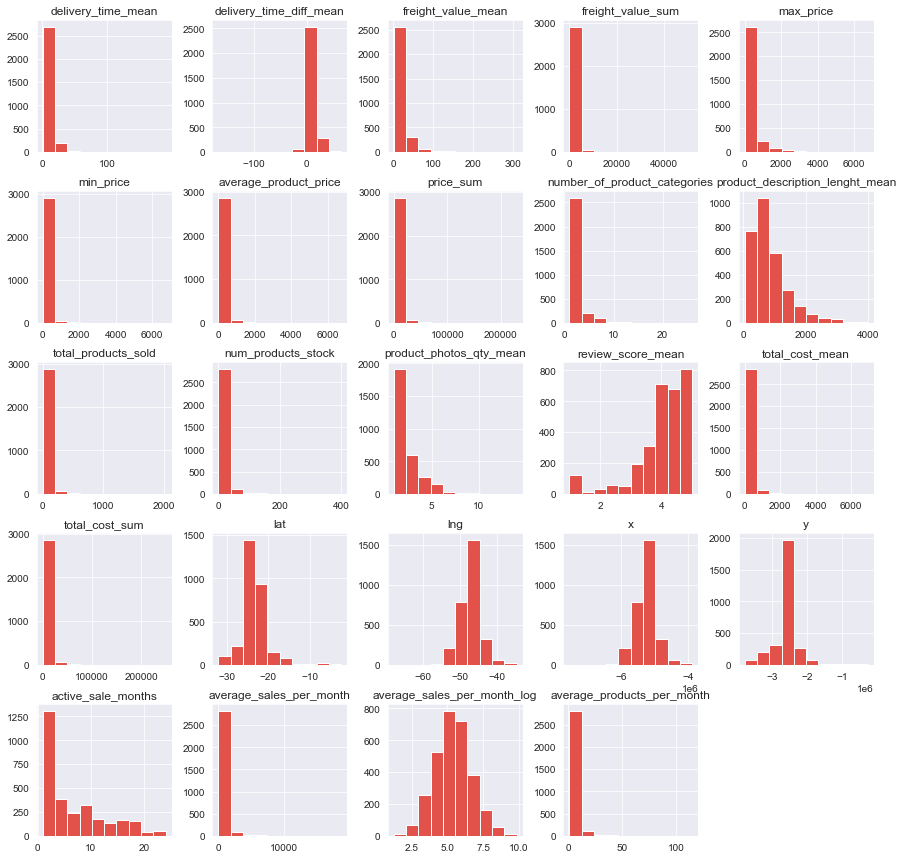

In [127]:
sellers_master.hist(figsize=(15,15));

In [131]:
tooltips = [
    ('Zip Code', '@zip_code_prefix_3_digits'),
    ('State', '@state'),
    ('Dominant Product Category', '@most_common_cat'),
    ('Total Products Sold', '@total_products_sold'),
    ('Total Earned', '@price_sum'),
    ('Average Sales Per Month', '@average_sales_per_month') ]

hover = HoverTool(tooltips=tooltips)

points_sold = hv.Points(hv.Dataset(sellers_master, kdims=['x', 'y'], 
                                  vdims=['total_products_sold','zip_code_prefix_3_digits','state', 'most_common_cat'])).opts(color='total_products_sold', cmap=fire,
                                        title='Total Products Sold by Seller', tools=[hover], colorbar=True, logz=True)


points_earned = hv.Points(hv.Dataset(sellers_master, kdims=['x', 'y'], 
                                   vdims=['price_sum','zip_code_prefix_3_digits', 'state', 'most_common_cat'])).opts(color='price_sum', cmap=fire,
                                    title='Total Earned by Seller',
                                    tools=[hover], colorbar=True, logz=True)

points_mth = hv.Points(hv.Dataset(sellers_master, kdims=['x', 'y'], 
                                   vdims=['average_sales_per_month','zip_code_prefix_3_digits','state', 'most_common_cat'])).opts(color='average_sales_per_month', cmap=fire,
                                    title='Average Monthly Sales by Seller',
                                    tools=[hover], colorbar=True, logz=True)

seller_dict = {'Total Sales': points_sold,
                'Total Earned': points_earned,
              'Average Monthly Sales': points_mth}

seller_map = hv.HoloMap(seller_dict, 'Sort by:')

(brazil_map * seller_map).opts(width=600)

:HoloMap   [Sort by:]
   :Overlay
      .Tiles.I  :Tiles   [x,y]
      .Points.I :Points   [x,y]   (total_products_sold,zip_code_prefix_3_digits,state,most_common_cat)

Based on our plots, we see that most of our sellers, like our customers, are concentrated in the southeastern portion of the country, and they are more likely to have a higher total sales and higher average monthly sales as well. It is likely that the location of our sellers plays an effect on how much they can potentially earn on the platform.

In [129]:
# Delivery time and freight value

tooltips = [
    ('Zip Code', '@zip_code_prefix_3_digits'),
    ('State', '@state'),
    ('Dominant Product Category', '@most_common_cat'),
    ('Mean Freight Value', '@freight_value_mean{$0,0.00}'),
    ('Delivery Time Mean', '@delivery_time_mean{0.0000}'),
    ('Delivery Time Difference Mean', '@delivery_time_diff_mean{0.0000}')]

hover = HoverTool(tooltips=tooltips)

points_freight = hv.Points(hv.Dataset(sellers_master, kdims=['x', 'y'], 
        vdims=['delivery_time_mean','delivery_time_diff_mean','freight_value_mean','zip_code_prefix_3_digits', 'state','most_common_cat'])).opts(color='freight_value_mean', cmap=fire,
        title='Mean Freight Value for Sellers',
        tools=[hover], colorbar=True)


points_dev = hv.Points(hv.Dataset(sellers_master, kdims=['x', 'y'], 
        vdims=['delivery_time_diff_mean','delivery_time_mean','zip_code_prefix_3_digits', 'state','most_common_cat'])).opts(color='delivery_time_mean', cmap='RdYlBu',
        title='Mean Delivery Time for Seller', tools=[hover], colorbar=True)


points_diff = hv.Points(hv.Dataset(sellers_master, kdims=['x', 'y'], 
        vdims=['delivery_time_diff_mean','zip_code_prefix_3_digits','state','most_common_cat'])).opts(color='delivery_time_diff_mean', cmap='RdYlBu',
        title='Mean Delivery Time Difference for Seller',
        tools=[hover], colorbar=True)



delivery_dict = {'Freight value': points_freight,
                'Delivery time difference': points_diff,
                'Delivery time': points_dev}

delivery_map = hv.HoloMap(delivery_dict, 'Sort by:')

(brazil_map * delivery_map).opts(width=600)

:HoloMap   [Sort by:]
   :Overlay
      .Tiles.I  :Tiles   [x,y]
      .Points.I :Points   [x,y]   (delivery_time_mean,delivery_time_diff_mean,freight_value_mean,zip_code_prefix_3_digits,state,most_common_cat)

Interestingly, sellers that are not in the southeastern area of Brazil do not seem to be significantly penalized for the distance of delivery the same way that the customers are, at least based on the data that we have. This indicates that the logistics for these sellers is still efficient and that location is not really a barrier for sellers to join our platform.

In [130]:
# Review Scores

tooltips = [
    ('Zip Code', '@zip_code_prefix_3_digits'),
    ('State', '@state'),
    ('Dominant Product Category', '@most_common_cat'),
    ('Review Score Mean', '@review_score_mean{0.00}')]

hover = HoverTool(tooltips=tooltips)

points = hv.Points(hv.Dataset(sellers_master, kdims=['x', 'y'], vdims=['review_score_mean','zip_code_prefix_3_digits','state', 'most_common_cat'])) \
                                    .opts(color='review_score_mean', cmap=fire, title='Mean Review Score for Seller',
                                    tools=[hover], colorbar=True)
brazil_map * points

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [x,y]   (review_score_mean,zip_code_prefix_3_digits,state,most_common_cat)

Again, the review scores seem to be evenly distributed geographically, and sellers in more central or northern areas are not significantly reviewed worse compared to those in the central areas.

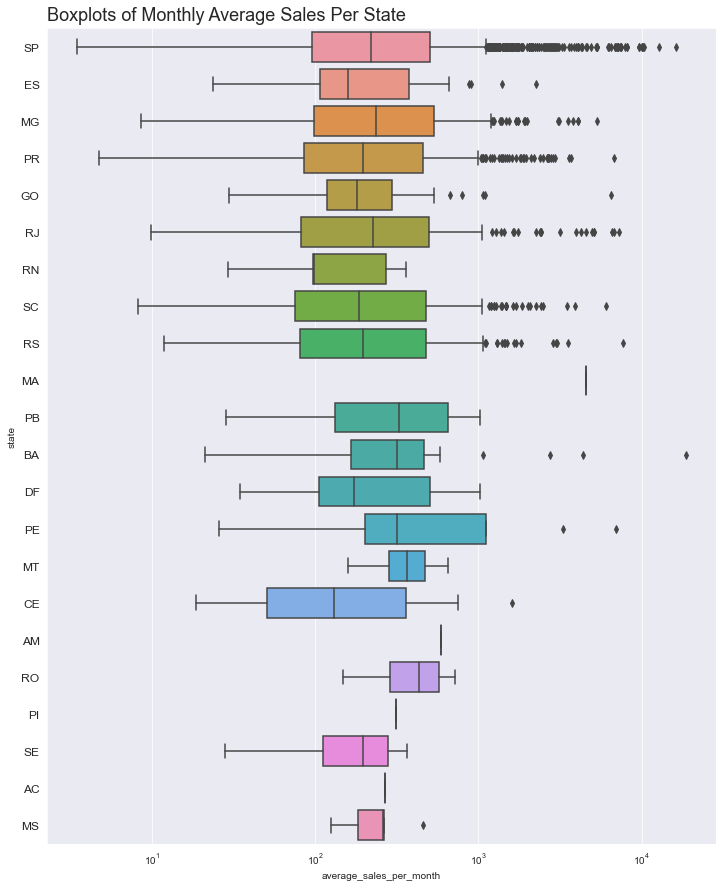

In [157]:
plt.figure(figsize=(12,15))
sns.boxplot(x = sellers_master['average_sales_per_month'], y = sellers_master['state']);
plt.title("Boxplots of Monthly Average Sales Per State",  loc='left', fontsize=18, pad=8);
plt.yticks(fontsize=12)
plt.xscale('log')
plt.savefig('ave_sales_state.png', transparent=False)

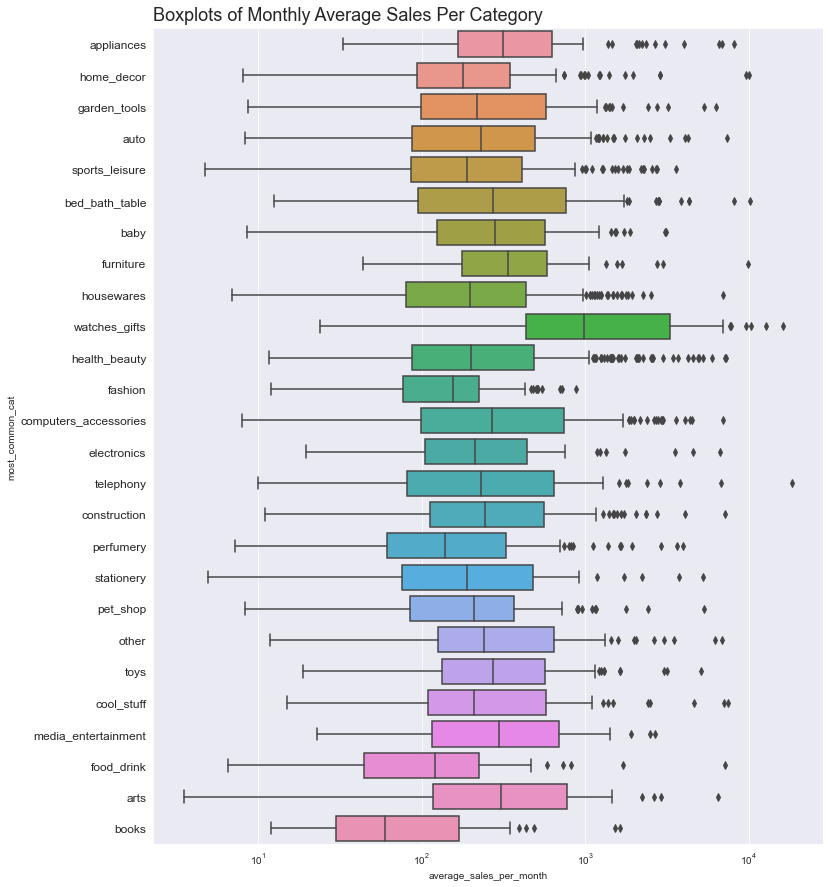

In [156]:
plt.figure(figsize=(12,15))
sns.boxplot(x = sellers_master['average_sales_per_month'], y = sellers_master['most_common_cat']);
plt.title("Boxplots of Monthly Average Sales Per Category", loc='left', fontsize=18, pad=8);
plt.yticks(fontsize=12)
plt.xscale('log')
plt.savefig('ave_sales_cat.png', transparent=False)

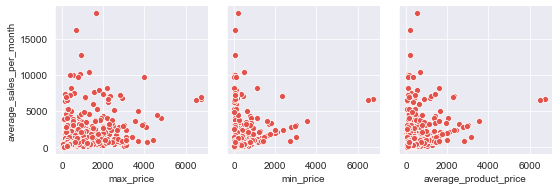

In [153]:
sns.pairplot(x_vars=['max_price', 'min_price', 'average_product_price'], y_vars='average_sales_per_month', data = sellers_master)
plt.savefig('wooo.png', transparent=False)

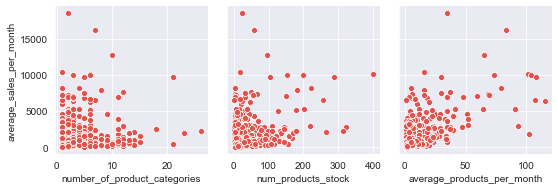

In [154]:
sns.pairplot(x_vars=['number_of_product_categories', 
       'num_products_stock', 'average_products_per_month'], y_vars='average_sales_per_month', data = sellers_master)

plt.savefig('wooo2.png', transparent=False)


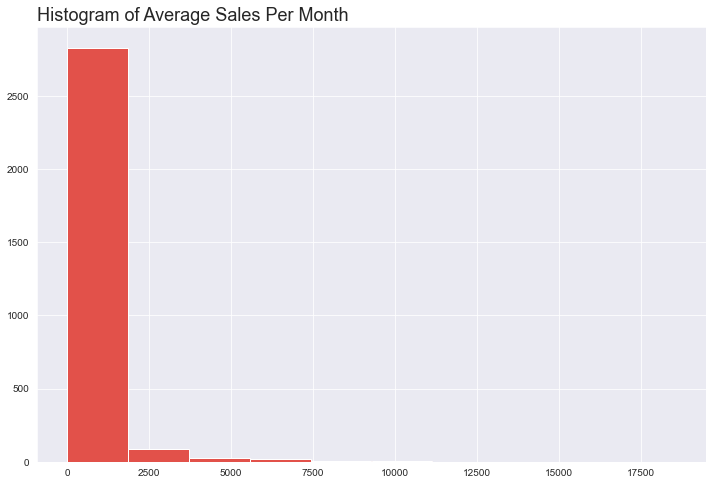

In [164]:
plt.title("Histogram of Average Sales Per Month", fontsize=18, loc = 'left')
sellers_master['average_sales_per_month'].hist(figsize=(12,8))
plt.savefig('hist.png', transparent=False)

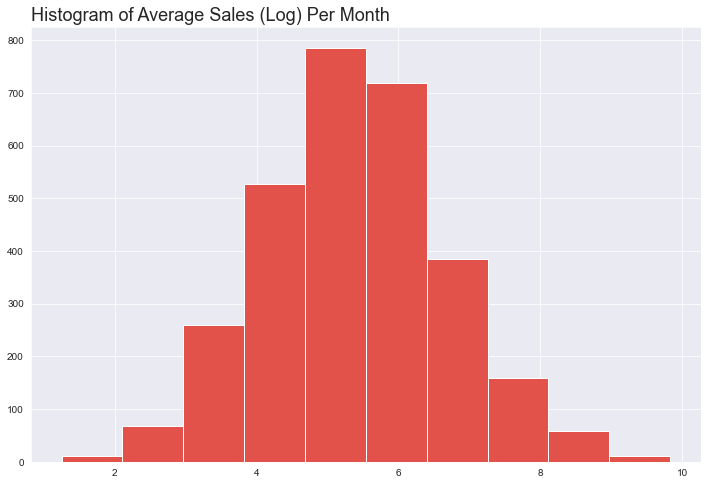

In [163]:
plt.title("Histogram of Average Sales (Log) Per Month", fontsize=18, loc = 'left')
sellers_master['average_sales_per_month_log'].hist(figsize=(12,8))
plt.savefig('hist2.png', transparent=False)

### Prepping seller data for modeling

Our goal is to predict seller performance, or sales value, based on seller characteristics. We can also consider taking the log of this value. First, let's take a look at the correlation of the two potential target metrics against possible seller characteristics.

In [85]:
sellers_master.columns

Index(['seller_id', 'delivery_time_mean', 'delivery_time_diff_mean',
       'freight_value_mean', 'freight_value_sum', 'most_recent_sale',
       'earliest_sale', 'max_price', 'min_price', 'average_product_price',
       'price_sum', 'list_of_product_cats', 'most_common_cat',
       'number_of_product_categories', 'product_description_lenght_mean',
       'total_products_sold', 'num_products_stock', 'product_photos_qty_mean',
       'review_score_mean', 'total_cost_mean', 'total_cost_sum',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'zip_code_prefix', 'state', 'lat', 'lng', 'zip_code_prefix_1_digits',
       'zip_code_prefix_2_digits', 'zip_code_prefix_3_digits',
       'zip_code_prefix_4_digits', 'x', 'y', 'active_sale_months',
       'average_sales_per_month', 'average_sales_per_month_log',
       'average_products_per_month'],
      dtype='object')

In [86]:
# Define characteristics we may know from the seller + target variables
seller_chars = ['max_price', 'min_price', 'average_product_price',
       'most_common_cat', 'number_of_product_categories', 
       'num_products_stock', 'average_products_per_month','seller_zip_code_prefix', 
        'state', 'lat', 'lng', 'zip_code_prefix_2_digits',
       'average_sales_per_month', 
       'average_sales_per_month_log']

In [89]:
sellers_master[seller_chars].corr()[['average_sales_per_month_log', 'average_sales_per_month']]

average_sales_per_month_log  \
max_price                                        0.542710   
min_price                                        0.280114   
average_product_price                            0.425159   
number_of_product_categories                     0.298673   
num_products_stock                               0.399005   
average_products_per_month                       0.483880   
lat                                              0.036236   
lng                                              0.013586   
average_sales_per_month                          0.664714   
average_sales_per_month_log                      1.000000   

                              average_sales_per_month  
max_price                                    0.499753  
min_price                                    0.253607  
average_product_price                        0.380536  
number_of_product_categories                 0.230853  
num_products_stock                           0.439885  
average_products_per_month                   0.669268  
lat                                          0.036136  
lng                                          0.045636  
average_sales_per_month                      1.000000  
average_sales_per_month_log                  0.664714

Based on the correlation for each respective variable, we can see that there is quite a lot of correlation for the input variables.

Latitude and longitude appear to have little effect on our data, and since we are planning to leverage location data via the states or zip codes, we will drop these features.

Based on our analysis, we'll want to look at the dominant product category of the seller, number of product categories, number of unique products, average products per month sold and max, minimum and average product price. We will also want to consider the location of the seller by examining state data and zip code data.

Our target variable will be average sales per month where we will try to predict average_products_per_month as an additional feature, and we'll also consider the log of the data since it is more normally distributed.

In [90]:
sellers_final_cols = ['seller_id','max_price', 'min_price', 'average_product_price',
       'most_common_cat', 'number_of_product_categories', 
        'average_products_per_month',
       'num_products_stock',
       'state', 'zip_code_prefix_2_digits',
       'average_sales_per_month',
       'average_sales_per_month_log']

In [91]:
sellers_model = sellers_master[sellers_final_cols]

In [92]:
sellers_model.head()

seller_id  max_price  min_price  \
0  0015a82c2db000af6aaaf3ae2ecb0532     895.00      895.0   
1  f12d3c2a14729ae461b920c11fe20fdc      65.00       19.5   
2  001cca7ae9ae17fb1caed9dfb1094831     199.00       69.9   
3  002100f778ceb8431b7a1020ff7ab48f     129.90        9.9   
4  167fd940acebc789debd6eb418c46e38     299.98       27.9   

   average_product_price most_common_cat  number_of_product_categories  \
0             895.000000      appliances                             1   
1              33.131818      home_decor                             2   
2             104.937364    garden_tools                             2   
3              22.400000      home_decor                             1   
4             215.516000            auto                             1   

   average_products_per_month  num_products_stock state  \
0                         3.0                   1    SP   
1                         3.0                   4    SP   
2                        14.0                  11    ES   
3                         7.0                  24    SP   
4                         1.0                   3    SP   

  zip_code_prefix_2_digits  average_sales_per_month  \
0                       09                2685.0000   
1                       09                  91.1125   
2                       29                1393.3350   
3                       14                 156.8000   
4                       14                 153.9400   

   average_sales_per_month_log  
0                     7.895436  
1                     4.512095  
2                     7.239455  
3                     5.054971  
4                     5.036563

In [93]:
sellers_model.shape

(2981, 12)

In [94]:
sellers_model.to_csv('../datasets/processed/sellers_modeling.csv', index=False)

## Reviews

In [132]:
reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

As discussed earlier, we will need to translate the reviews before we can proceed with NLP on the reviews. For this, we will rely on the googletrans library, which is a free API. It does have some stability issues, which we will combat by filtering through the translations to make sure that the reviews have been translated, as well as filter out reviews with common Portuguese words.

In [313]:
# Fill null cells with empty strings
reviews = reviews.fillna("")

# Combine title and message
reviews["full_text"] = reviews["review_comment_title"] + " " + reviews["review_comment_message"]

In [314]:
reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                        
1             5                        
2             5                        
3             5                        
4             5                        

                              review_comment_message review_creation_date  \
0                                                     2018-01-18 00:00:00   
1                                                     2018-03-10 00:00:00   
2                                                     2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp                                          full_text  
0     2018-01-18 21:46:59                                                     
1     2018-03-11 03:05:13                                                     
2     2018-02-18 14:36:24                                                     
3     2017-04-21 22:02:06              Recebi bem antes do prazo estipulado.  
4     2018-03-02 10:26:53   Parabéns lojas lannister adorei comprar pela ...

In [311]:
translator = Translator()

In [331]:
# Function to translate review

def translate_review(string):
        if len(string) > 0: # For reviews that have text
            clean = string.replace("\r\n", " ") # Strip out text aretefacts
            try: # Try-except to translate the text, else return "Error"
                translated = translator.translate(clean, dest='en').text 
                return translated
            except:
                print("Error")
                return "Error"
        else:
            pass

# Function to detect language

def language(string):
    try:
        lang = translator.detect(string)
        return lang
    except:
        pass

In [330]:
# For loop to showcase the functionality

examples = reviews['full_text'][:20].tolist()
examples = [rev for rev in examples if len(rev) > 1]

for review in examples:
    translation = translate_review(review)
    print(translation)

I received it well before the deadline.
Congratulations lannister stores loved shopping online safe and practical Congratulations to all happy Easter
recommend efficient device. on the website the brand of the device is printed as 3desinfector and when it arrives with another name ... update with the correct brand since it is the same device
But a little, braking ... for the value ta Boa.
Super recommend Reliable seller, product ok and delivery before the deadline.
I WOULD LIKE TO KNOW WHAT HAS BEEN, I ALWAYS RECEIVED AND THIS PURCHASE NOW DEFECTED ME
My poor product did not arrive


To translate the reviews, the function was applied to the 'full_text' column in a for loop, with the following code:

```
translated_reviews = []
review_ids = []

for i in range(reviews.shape[0]):
    review = reviews['full_text'][i]
    translation = translate_review(review)
    
    translated_reviews.append(translation) # Append the translation
    
    review_ids.append(reviews['review_id'][i]) # Append the review_id
    
    if i % 1000 == 0: # At every 1000 rows, we save the translated reviews
        print(f"{i} rows have been processed")
        saved_df = pd.DataFrame(translated_reviews, columns=['translated_review'])
        saved_df['review_id'] = review_ids
        saved_df.to_csv('translated_reviews_save.csv', index=False)
        
    if len(translated_reviews) == reviews.shape[0]: # When the loop is done, save the dataframe
        saved_df = pd.DataFrame(translated_reviews, columns=['translated_review'])
        saved_df['review_id'] = review_ids
        saved_df.to_csv('translated_reviews_save_final.csv', index=False)
 ```
 
After this, we combine the dataframe with the original reviews dataset and check each translated review for the language of the review. After some filtering, we are left with a reviews dataset of around 40,000 records.

In [718]:
final_reviews = pd.read_pickle("../datasets/processed/final_reviews.pkl")

In [719]:
final_reviews.shape

(43371, 10)

In [720]:
final_reviews.head()

review_id                          order_id  \
0  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
1  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
2  8670d52e15e00043ae7de4c01cc2fe06  b9bf720beb4ab3728760088589c62129   
4  3948b09f7c818e2d86c9a546758b2335  e51478e7e277a83743b6f9991dbfa3fb   
5  9314d6f9799f5bfba510cc7bcd468c01  0dacf04c5ad59fd5a0cc1faa07c34e39   

   review_score review_comment_title  \
0             5                  NaN   
1             5                  NaN   
2             4            recomendo   
4             5      Super recomendo   
5             2                  NaN   

                              review_comment_message review_creation_date  \
0              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
1  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   
2  aparelho eficiente. no site a marca do aparelh...  2018-05-22 00:00:00   
4  Vendedor confiável, produto ok e entrega antes...  2018-05-23 00:00:00   
5  GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E...  2018-01-18 00:00:00   

  review_answer_timestamp                                  translated_review  \
0     2017-04-21 22:02:06            I received it well before the deadline.   
1     2018-03-02 10:26:53  Congratulations lannister stores loved shoppin...   
2     2018-05-23 16:45:47  recommend efficient device. on the website the...   
4     2018-05-24 03:00:01  Super recommend Reliable seller, product ok an...   
5     2018-01-20 21:25:45  I WOULD LIKE TO KNOW WHAT HAPPENED, I ALWAYS R...   

                                              review  \
0            I received it well before the deadline.   
1  Congratulations lannister stores loved shoppin...   
2  recommend efficient device. on the website the...   
4  Super recommend Reliable seller, product ok an...   
5  I WOULD LIKE TO KNOW WHAT HAPPENED, I ALWAYS R...   

                                lang  
0  Detected(lang=en, confidence=1.0)  
1  Detected(lang=en, confidence=1.0)  
2  Detected(lang=en, confidence=1.0)  
4  Detected(lang=en, confidence=1.0)  
5  Detected(lang=en, confidence=1.0)

### Preparing the Reviews Data

In [722]:
final_reviews['review_score'].value_counts()

5    23668
4     7659
1     6661
3     3660
2     1723
Name: review_score, dtype: int64

In [723]:
# Show example of review for each rating
for i in range(1,6):
    print(f"Rating: {i}")
    print(final_reviews[final_reviews['review_score'] == i]['translated_review'].tolist()[0])
    print("*" * 25)

Rating: 1
My poor product did not arrive
*************************
Rating: 2
I WOULD LIKE TO KNOW WHAT HAPPENED, I ALWAYS RECEIVED AND THAT PURCHASE NOW DEFECTED ME
*************************
Rating: 3
I bought two units and only received one and now what do I do?
*************************
Rating: 4
recommend efficient device. on the website the brand of the device is printed as 3desinfector and when it arrives with another name ... update with the correct brand since it is the same device
*************************
Rating: 5
I received it well before the deadline.
*************************


In [724]:
nltk.download('words')
en_words = set(nltk.corpus.words.words())
stops = sp.Defaults.stop_words 

[nltk_data] Downloading package words to /Users/apple/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [725]:
def post_to_words_spacy(text):
    # Function to convert a raw post to a string of words
    # The input is a single string and 
    # the output is a single string
    
    # 1. Remove HTML and create spacy object
    #review_text = BeautifulSoup(raw_text).get_text()
    letters_only = re.sub("[^a-zA-Z]", " ", text)
    sentence = sp(letters_only.lower())

    # 2. Remove non-letters and spaces,split into tokens
    words = [w for w in sentence if not w.is_punct | w.is_space | w.like_num]
    
    # 3. Lemmatize and remove stopwords using tokens 
    english_words = [w for w in words if w.orth_ in en_words]
    
    meaningful_words = [w.lemma_ for w in english_words if w.orth_ not in stops]

    
    # 4. Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(meaningful_words))

In [728]:
for example in example_reviews:
    result = post_to_words_spacy(example)
    print(result)

receive deadline
shopping safe practical happy easter
recommend efficient device brand device print update correct brand device
super recommend reliable seller product delivery deadline
like know receive purchase
poor product arrive
great store note
thank kind attention
purchase easily delivery give deadline product date
beautiful cheap watch
like buy pig poke
buy delivery place agree deadline believe maximum period stark maximum term receive product
good get exactly time
good recommend
good
wonderful m completely love super responsible reliable store
order
perfect delivery good fragrant
great seller deadline product
smooth efficient process


In [729]:
final_reviews['cleaned_text'] = final_reviews['translated_review'].apply(post_to_words_spacy)

In [730]:
final_reviews[final_reviews['cleaned_text'] == ""].shape

(16924, 4)

In [731]:
final_reviews = final_reviews[~(final_reviews['cleaned_text'] == "")]

In [732]:
final_reviews.to_csv("../datasets/processed/review_modeling.csv", index=False)

# Next Steps

We have completed our EDA of the datasets we are using. 

In the next notebook, we will start modeling our seller data as well as perform topic modeling onto our cleaned reviews.